# Importantion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

import keras
import tensorflow

import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer  # Feature scaling
from sklearn.preprocessing import RobustScaler                # Outlizer

# DL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, regularizers


#Demension Reduction
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding

#Feature Selection
from sklearn.feature_selection import VarianceThreshold, SelectPercentile,f_classif, SelectFpr

#Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

#Search for the best & Validation Curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, validation_curve

#score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

Mounted at /content/drive


In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV

from keras.layers import Flatten

In [ ]:
# load data chia bằng tay
df_smote_train = pd.read_csv('/content/drive/MyDrive/SZ data/Major Psychiatric Disorders (Resting-State EEG using a ML)/SZ_BD_D_smote_train.csv')
df_smote_test = pd.read_csv('/content/drive/MyDrive/SZ data/Major Psychiatric Disorders (Resting-State EEG using a ML)/SZ_BD_D_smote_test.csv')

In [ ]:
# load data chia bằng tay
df_smote_train = pd.read_csv('/content/drive/MyDrive/Data/Major Psychiatric Disorders/SZ_BD_D_smote_train.csv')
df_smote_test = pd.read_csv('/content/drive/MyDrive/Data/Major Psychiatric Disorders/SZ_BD_D_smote_test.csv')

In [ ]:
# shuffle data
df_smote_train = df_smote_train.sample(frac = 1)
df_smote_test  = df_smote_test.sample(frac = 1)

# X,y
X_train = df_smote_train.drop(['specific.disorder','Unnamed: 0'],axis=1) # Train
y_train = df_smote_train['specific.disorder']
X_test  = df_smote_test.drop(['specific.disorder','Unnamed: 0'],axis=1)  # Test
y_test  = df_smote_test['specific.disorder']
# check the shape
print("Shape of Feature matrix & Target vector",X_train.shape,y_train.shape)

# fix y_value form (1,2,3) to (0,1,2)
y_train = y_train.replace({1: 0, 2: 1, 3:2})
y_test = y_test.replace({1: 0, 2: 1, 3:2})
print(y_train)

print("TEST SET:\n",y_test.value_counts())
print("\nTRAIN SET:\n",y_train.value_counts())

# Standaer Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Shape of Feature matrix & Target vector (477, 1140) (477,)
155    0
287    1
414    2
333    2
145    0
      ..
194    1
215    1
128    0
359    2
230    1
Name: specific.disorder, Length: 477, dtype: int64
TEST SET:
 1    40
2    40
0    40
Name: specific.disorder, dtype: int64

TRAIN SET:
 0    159
1    159
2    159
Name: specific.disorder, dtype: int64


# PCA

In [ ]:
pca99 = PCA(n_components=0.99)
X_train_pca99 = pca99.fit_transform(X_train)
X_test_pca99 = pca99.transform(X_test)
print("Orignal:",X_train.shape[1],"After PCA99:",X_train_pca99.shape[1])

pca95 = PCA(n_components=0.95)
X_train_pca95 = pca95.fit_transform(X_train)
X_test_pca95 = pca95.transform(X_test)
print("Orignal:",X_train.shape[1],"After PCA95:",X_train_pca95.shape[1])

Orignal: 1140 After PCA99: 163
Orignal: 1140 After PCA95: 73


# Evaluate model

In [ ]:
# lib for ROC curve of MULTIPLE CLASS
!pip install scikit-plot
import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix, mean_absolute_error
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
# Function for FIT and PREDICTION -> y_test and y_proba
def fit_predict(pipeline):
  """ Train the model. Predict y_test and y_prob"""
  """ Input: Pipeline. Output: y_pred & y_prob (for auc)"""
  pipeline.fit(X_train,y_train)      # Fit
  y_pred = pipeline.predict(X_test)  # Predict
  y_pred_proba = pipeline.predict_proba(X_test) # Predict Probability
  return y_pred,y_pred_proba

def results_of_model2(y_test,y_pred):
  results = {} # dict { metric:value, ...}

  results["accuracy"]           = accuracy_score(y_test,y_pred)
  results["f1_score"]           = f1_score(y_test, y_pred, average='macro')
  #results["f1_score_weighted"] = f1_score(y_test, y_pred, average='weighted')
  results["precision_score"]    = precision_score(y_test, y_pred, average='macro')
  #results['precision_score_weighted'] = precision_score(y_test, y_pred, average='weighted')
  results['recall_score']       = recall_score(y_test, y_pred, average='macro')
  #results['recall_score_weighted'] = recall_score(y_test, y_pred, average='weighted')

  confusion = confusion_matrix(y_pred,y_test)
  results['recall for class 1'] = metrics.recall_score(y_test, y_pred,average=None,zero_division=1)[0]
  results['recall for class 2'] = metrics.recall_score(y_test, y_pred,average=None,zero_division=1)[1]
  results['recall for class 3'] = metrics.recall_score(y_test, y_pred,average=None,zero_division=1)[2]
  results['precision for class 1'] = metrics.precision_score(y_test, y_pred,average=None,zero_division=1)[0]
  results['precision for class 2'] = metrics.precision_score(y_test, y_pred,average=None,zero_division=1)[1]
  results['precision for class 3'] = metrics.precision_score(y_test, y_pred,average=None,zero_division=1)[2]
  return results

# Function for CONFUNSION MATRIX
## Function for calculate cf
def confunsion_matrix(y_pred):
  """ Calculate CF from y_pred and y_test """
  return confusion_matrix(y_test, y_pred)
## Function for plotting the calculated cf
def plotting_confunsion_matrix(cf_matrix):
  """ Plot the Confunsion matrix by SNS from the calculated CF.
      If use the plot_confusion_matrix function: we have to fit and predict again """
  df_df = pd.DataFrame(cf_matrix, range(3), range(3))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_df, annot=True, annot_kws={"size": 16}) # font size
  plt.show()



# Plot the ROC CURVE
# using the lib
def plotting_roc_curve(y_pred_proba):
  skplt.metrics.plot_roc_curve(y_test, y_pred_proba,
                               figsize=(10,10),title_fontsize='medium')
  plt.show()

def combination_measurement(y_pred,y_pred_proba):

  # classification results
  print("Classification Results:")
  print(classification_report(y_test,y_pred))

  #
  results_df = results_of_model2(y_test,y_pred)
  print(results_df)

  # Confusion matrix
  cf_matrix = confunsion_matrix(y_pred)  # calculate Confusion matrix
  plotting_confunsion_matrix(cf_matrix)  # plot Confusion matrix

  # ROC AUC
  plotting_roc_curve(y_pred_proba)                    # Plotting

# Wrpapped into a keras

In [ ]:
# function to create & compile NN
def create_network():
  """function to build and compile NN in order to wrapped with Keras for CV and GrichSearch"""
  # build model
  model = Sequential()
  model.add(keras.layers.Flatten(input_shape=(1140,)))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation=var_activation))#,kernel_regularizer=regularizers.L2(0.5)))
  model.add(Dropout(0.2))
  model.add(Dense(3, activation=var_activation))#,kernel_regularizer=regularizers.L1(0.05)))

  # COmpile model
  opt = Adam(lr=0.1) # adam(0.1), SGD(lr=0.01)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  return model

# Wrap Keras model with Scikilearn so that sklearn's function can be used NOW
wrapped_nn = KerasClassifier(build_fn=model,
                             epochs=150, batch_size=256,verbose=0)

NameError: ignored

## to CV

In [ ]:
# Eavluate neural network using Cross Validation
cross_val_score(wrapped_nn, X_train_std,y_SZ_BD_D_train, cv=3)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 153, in fit
    **self.filter_sk_params(self.build_fn.__call__))
  File "/usr/l

array([nan, nan, nan])

# Tuning

In [ ]:
def build_model(var_activation1='relu', hiddenLayer1=10,
                var_activation2='relu', hiddenLayer2=10,
                var_activation3='relu', hiddenLayer3=10,
                var_optimizer=Adam,     learnRate=0.01,
                dropout0=0.2,  dropout1=0.2, dropout2=0.2, dropout3=0.2):

  """ Uses arguments to build Keras model. """

  model = Sequential()
  model.add(Flatten(input_shape=(1140,)))
  model.add(Dropout(dropout0))
  model.add(Dense(hiddenLayer1, activation=var_activation1))
  model.add(Dropout(dropout1))
  model.add(Dense(hiddenLayer2, activation=var_activation2))
  model.add(Dropout(dropout2))
  model.add(Dense(hiddenLayer3, activation=var_activation3))
  model.add(Dropout(dropout3))
  model.add(Dense(3,activation='softmax'))

  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=var_optimizer(learning_rate=learnRate),
                metrics=["accuracy"])

  return model

In [ ]:
model_default = build_model()
model_default.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 1140)              0         
                                                                 
 dropout_54 (Dropout)        (None, 1140)              0         
                                                                 
 dense_54 (Dense)            (None, 10)                11410     
                                                                 
 dropout_55 (Dropout)        (None, 10)                0         
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dropout_56 (Dropout)        (None, 10)                0         
                                                                 
 dense_56 (Dense)            (None, 10)              

In [ ]:
# Set variables
activations = ['selu'] # ['tanh','relu','selu','softmax','sigmoid']
optimizers  = [Adam, SGD, RMSprop]
learnRate   = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]   # than 1.0 and greater than 10^-6.
hiddenLayer = [2,4,6,8,10,12,14,16,18,20]
dropout1    = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
dropout2    = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

params=dict(var_activation=activations,
            var_optimizer=optimizers,
            learnRate = learnRate,
            hiddenLayer = hiddenLayer,
            dropout1=dropout1,
            dropout2=dropout2
            )

print(params)

{'var_activation': ['selu'], 'var_optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>, <class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'>, <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>], 'learnRate': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 'hiddenLayer': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'dropout1': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'dropout2': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}


In [ ]:
# Set variables
activations1 = ['relu'] # ['tanh','relu','selu','softmax','sigmoid']
hiddenLayer1 = [10] # [20,18,16,14,12,10]

activations2 = ['tanh','relu','selu','softmax','sigmoid']
hiddenLayer2 = [9,8,7,6] # [2,4,6,8,10,12,14,16,18,20]

activations3 = ['tanh','relu','selu','softmax','sigmoid']
hiddenLayer3 = [5,4]

optimizers  = [Adam, SGD, RMSprop]
learnRate   = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]    # than 1.0 and greater than 10^-6.

dropout0    = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
dropout1    = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
dropout2    = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
dropout3    = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

params=dict(var_activation1=activations1,  hiddenLayer1 = hiddenLayer1,
            var_activation2=activations2,  hiddenLayer2 = hiddenLayer2,
            var_optimizer=optimizers,      learnRate = learnRate,
            dropout1=dropout1,             dropout2=dropout2,              dropout3=dropout3
            )

In [ ]:
model = KerasClassifier(build_fn=build_model,epochs=150,batch_size=256)
np.random.seed(42)

<ipython-input-11-dc87e8beb5f2>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model,epochs=150,batch_size=256)


In [ ]:
#rscv = GridSearchCV(model,  param_grid=params, cv=3,     n_jobs=-1)
rscv = RandomizedSearchCV(model,  param_distributions=params, cv=3,     n_jobs=-1)
rscv_results = rscv.fit(X_train,y_train)

print('Best score is: {} using {}'.format(rscv_results.best_score_,rscv_results.best_params_))

y_pred = rscv_results.predict(X_test)
y_pred_prob =  rscv_results.predict_proba(X_test)

print('Best Prediction:')
print(   classification_report(y_test,y_pred) )

combination_measurement(y_pred,y_pred_prob)

KeyboardInterrupt: ignored

# Tuning with BatchNorm

In [ ]:
from keras.layers import BatchNormalization
from keras.activations import relu, sigmoid, softmax, selu, tanh, elu

def buildModelWithBatchNorm(var_activation1='relu', hiddenLayer1=10,
                            var_activation2='relu', hiddenLayer2=10,
                            var_activation3='relu', hiddenLayer3=10,
                            var_optimizer=Adam,     learnRate=0.01,
                            dropout0=0.2,  dropout1=0.2, dropout2=0.2, dropout3=0.2):


  model = Sequential()
  model.add(Flatten(input_shape=(1140,)))                    # Input
  model.add(Dropout(dropout0))

  model.add(Dense(hiddenLayer1)) # Hidden 1
  model.add(BatchNormalization())
  model.add(layers.Activation(var_activation1))
  model.add(Dropout(dropout1))

  model.add(Dense(hiddenLayer2)) # Hidden 2
  model.add(BatchNormalization())
  model.add(layers.Activation(var_activation2))
  model.add(Dropout(dropout2))

  model.add(Dense(hiddenLayer3)) # Hidden 3
  model.add(BatchNormalization())
  model.add(layers.Activation(var_activation3))
  model.add(Dropout(dropout3))

  model.add(Dense(3,activation='softmax'))

  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=var_optimizer(learning_rate=learnRate),
                metrics=["accuracy"])

  return model

In [ ]:
model_default = buildModelWithBatchNorm()
model_default.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1140)              0         
                                                                 
 dropout (Dropout)           (None, 1140)              0         
                                                                 
 dense (Dense)               (None, 10)                11410     
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                        

In [ ]:
# Set variables
activations1 = ['relu'] # ['tanh','relu','selu','softmax','sigmoid']
hiddenLayer1 = [8] # [2,4,6,8,10,12,14,16,18,20]

activations2 = ['tanh','relu','selu','softmax','sigmoid']
hiddenLayer2 = [6] # [2,4,6,8,10,12,14,16,18,20]

activations3 = ['tanh','relu','selu','softmax','sigmoid']
hiddenLayer3 = [4]

optimizers  = [Adam] # [Adam, SGD, RMSprop]
learnRate   = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]    # than 1.0 and greater than 10^-6.
# [0.5,0.1,0.05,0.01,0.005]

dropout0    = [0.2]
dropout1    = [0.2]
dropout2    = [0.1] # [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
dropout3    = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

params=dict(var_activation1=activations1,  hiddenLayer1 = hiddenLayer1,
            var_activation2=activations2,  hiddenLayer2 = hiddenLayer2,
            var_optimizer=optimizers,      learnRate = learnRate,
            dropout1=dropout1,             dropout2=dropout2,              dropout3=dropout3
            )

<ipython-input-23-ff95d07aa6a2>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=buildModelWithBatchNorm, epochs=300, batch_size=256)


Epoch 1/300
2/2 [==============================] - 1s 11ms/step - loss: 1.2639 - accuracy: 0.3208
Epoch 2/300
2/2 [==============================] - 0s 8ms/step - loss: 1.1145 - accuracy: 0.3711
Epoch 3/300
2/2 [==============================] - 0s 8ms/step - loss: 1.1088 - accuracy: 0.3836
Epoch 4/300
2/2 [==============================] - 0s 8ms/step - loss: 1.1201 - accuracy: 0.3795
Epoch 5/300
2/2 [==============================] - 0s 7ms/step - loss: 1.1000 - accuracy: 0.3417
Epoch 6/300
2/2 [==============================] - 0s 9ms/step - loss: 1.0894 - accuracy: 0.3606
Epoch 7/300
2/2 [==============================] - 0s 7ms/step - loss: 1.0885 - accuracy: 0.3816
Epoch 8/300
2/2 [==============================] - 0s 7ms/step - loss: 1.0753 - accuracy: 0.3816
Epoch 9/300
2/2 [==============================] - 0s 7ms/step - loss: 1.0809 - accuracy: 0.3878
Epoch 10/300
2/2 [==============================] - 0s 7ms/step - loss: 1.0908 - accuracy: 0.4025
Epoch 11/300
2/2 [==========

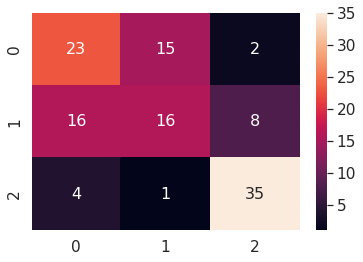

In [ ]:
model = KerasClassifier(build_fn=buildModelWithBatchNorm, epochs=300, batch_size=256)
np.random.seed(42)

#rscv = GridSearchCV(model,  param_grid=params, cv=3,     n_jobs=-1)
rscv = RandomizedSearchCV(model,  param_distributions=params, cv=3,     n_jobs=-1)
rscv_results = rscv.fit(X_train,y_train)

print('Best score is: {} using {}'.format(rscv_results.best_score_,rscv_results.best_params_))

y_pred = rscv_results.predict(X_test)

print('Best Prediction:')
print(   classification_report(y_test,y_pred) )

cf_matrix = confusion_matrix(y_test, y_pred)
df_df = pd.DataFrame(cf_matrix, range(3), range(3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_df, annot=True, annot_kws={"size": 16}) # font size
plt.show()

In [ ]:
Best score is: 0.6037735939025879 using {Adam,
                                         'var_activation2': 'relu',  'var_activation1': 'relu',
                                         'learnRate': 0.005,
                                         'hiddenLayer2': 6, 'hiddenLayer1': 8,
                                         'dropout3': 0.2, 'dropout2': 0.1, 'dropout1': 0.2}

0.76

# Tank

Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 261ms/step - loss: 1.4110 - accuracy: 0.3202 - val_loss: 1.2622 - val_accuracy: 0.2917
Epoch 2/200
2/2 [==============================] - 0s 40ms/step - loss: 1.3504 - accuracy: 0.2887 - val_loss: 1.2589 - val_accuracy: 0.2812
Epoch 3/200
2/2 [==============================] - 0s 29ms/step - loss: 1.3431 - accuracy: 0.2651 - val_loss: 1.2527 - val_accuracy: 0.2812
Epoch 4/200
2/2 [==============================] - 0s 30ms/step - loss: 1.3270 - accuracy: 0.3202 - val_loss: 1.2441 - val_accuracy: 0.2708
Epoch 5/200
2/2 [==============================] - 0s 32ms/step - loss: 1.3142 - accuracy: 0.3412 - val_loss: 1.2365 - val_accuracy: 0.2917
Epoch 6/200
2/2 [==============================] - 0s 51ms/step - loss: 1.3008 - accuracy: 0.3281 - val_loss: 1.2280 - val_accuracy: 0.3229
Epoch 7/200
2/2 [==============================] - 0s 31ms/step - loss: 1.3466 - accuracy: 0.3018 - val_loss: 1.2205 - val_accuracy: 0.3229
Epoch 8/200
2/2 [==============

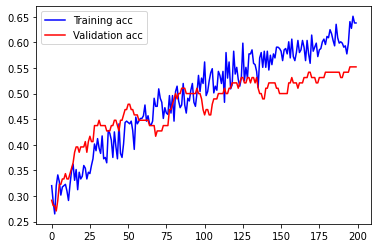

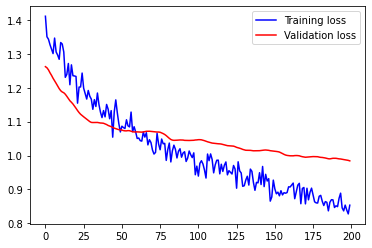

Epoch 1/200
2/2 [==============================] - 0s 143ms/step - loss: 1.5082 - accuracy: 0.2703 - val_loss: 1.3061 - val_accuracy: 0.4062
Epoch 2/200
2/2 [==============================] - 0s 46ms/step - loss: 1.4197 - accuracy: 0.2940 - val_loss: 1.1984 - val_accuracy: 0.4375
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 1.2670 - accuracy: 0.3465 - val_loss: 1.1263 - val_accuracy: 0.4375
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 1.2868 - accuracy: 0.3360 - val_loss: 1.0897 - val_accuracy: 0.4479
Epoch 5/200
2/2 [==============================] - 0s 23ms/step - loss: 1.2377 - accuracy: 0.3963 - val_loss: 1.0719 - val_accuracy: 0.4375
Epoch 6/200
2/2 [==============================] - 0s 23ms/step - loss: 1.2011 - accuracy: 0.3963 - val_loss: 1.0602 - val_accuracy: 0.4688
Epoch 7/200
2/2 [==============================] - 0s 26ms/step - loss: 1.1661 - accuracy: 0.3780 - val_loss: 1.0495 - val_accuracy: 0.4583
Epoch 8/200
2/2 [==

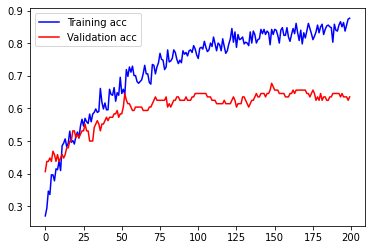

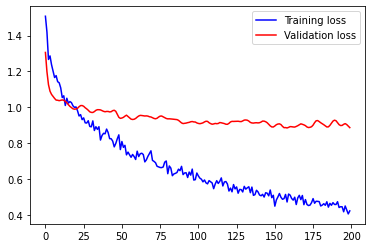

Epoch 1/200
2/2 [==============================] - 0s 160ms/step - loss: 1.3510 - accuracy: 0.2992 - val_loss: 1.2139 - val_accuracy: 0.4062
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 1.2618 - accuracy: 0.3491 - val_loss: 1.1684 - val_accuracy: 0.3958
Epoch 3/200
2/2 [==============================] - 0s 24ms/step - loss: 1.2095 - accuracy: 0.3727 - val_loss: 1.1449 - val_accuracy: 0.4062
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 1.1746 - accuracy: 0.3963 - val_loss: 1.1087 - val_accuracy: 0.4167
Epoch 5/200
2/2 [==============================] - 0s 21ms/step - loss: 1.1308 - accuracy: 0.4199 - val_loss: 1.0760 - val_accuracy: 0.4062
Epoch 6/200
2/2 [==============================] - 0s 22ms/step - loss: 1.0804 - accuracy: 0.4567 - val_loss: 1.0539 - val_accuracy: 0.4792
Epoch 7/200
2/2 [==============================] - 0s 21ms/step - loss: 1.1127 - accuracy: 0.4042 - val_loss: 1.0381 - val_accuracy: 0.5104
Epoch 8/200
2/2 [==

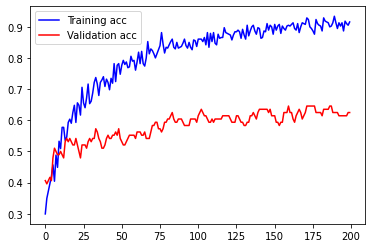

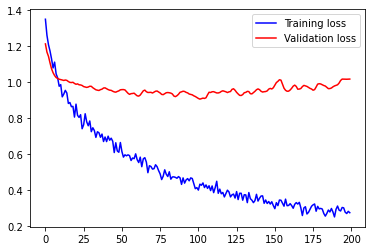

Epoch 1/200
2/2 [==============================] - 0s 145ms/step - loss: 1.4679 - accuracy: 0.3491 - val_loss: 1.3491 - val_accuracy: 0.3750
Epoch 2/200
2/2 [==============================] - 0s 23ms/step - loss: 1.3129 - accuracy: 0.3911 - val_loss: 1.1084 - val_accuracy: 0.3333
Epoch 3/200
2/2 [==============================] - 0s 24ms/step - loss: 1.0978 - accuracy: 0.4488 - val_loss: 1.0823 - val_accuracy: 0.4688
Epoch 4/200
2/2 [==============================] - 0s 24ms/step - loss: 1.0216 - accuracy: 0.5092 - val_loss: 1.0480 - val_accuracy: 0.4688
Epoch 5/200
2/2 [==============================] - 0s 30ms/step - loss: 1.0288 - accuracy: 0.4803 - val_loss: 1.0443 - val_accuracy: 0.4479
Epoch 6/200
2/2 [==============================] - 0s 25ms/step - loss: 1.0010 - accuracy: 0.5249 - val_loss: 1.0698 - val_accuracy: 0.4271
Epoch 7/200
2/2 [==============================] - 0s 24ms/step - loss: 0.9519 - accuracy: 0.5669 - val_loss: 1.0676 - val_accuracy: 0.4271
Epoch 8/200
2/2 [==

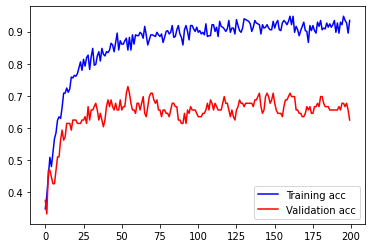

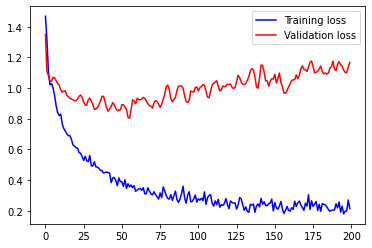

Epoch 1/200
2/2 [==============================] - 0s 127ms/step - loss: 1.5701 - accuracy: 0.3386 - val_loss: 1.6094 - val_accuracy: 0.3646
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 1.6600 - accuracy: 0.3333 - val_loss: 1.0603 - val_accuracy: 0.4479
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 1.1628 - accuracy: 0.4016 - val_loss: 1.0444 - val_accuracy: 0.4271
Epoch 4/200
2/2 [==============================] - 0s 24ms/step - loss: 1.0970 - accuracy: 0.4199 - val_loss: 1.0494 - val_accuracy: 0.4375
Epoch 5/200
2/2 [==============================] - 0s 23ms/step - loss: 1.1449 - accuracy: 0.3543 - val_loss: 1.0527 - val_accuracy: 0.4896
Epoch 6/200
2/2 [==============================] - 0s 22ms/step - loss: 1.0373 - accuracy: 0.4724 - val_loss: 1.0679 - val_accuracy: 0.4583
Epoch 7/200
2/2 [==============================] - 0s 25ms/step - loss: 1.0349 - accuracy: 0.4724 - val_loss: 1.0873 - val_accuracy: 0.4583
Epoch 8/200
2/2 [==

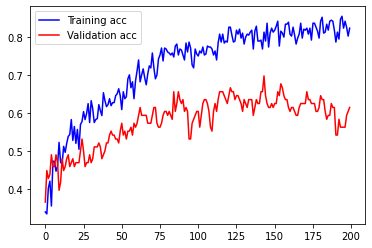

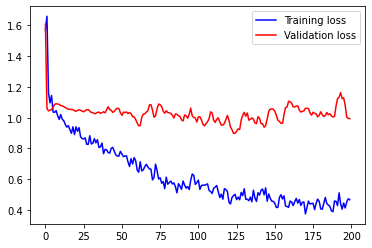

Epoch 1/200
2/2 [==============================] - 0s 144ms/step - loss: 1.3793 - accuracy: 0.3360 - val_loss: 1.1847 - val_accuracy: 0.3958
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 1.2191 - accuracy: 0.3911 - val_loss: 1.0788 - val_accuracy: 0.4167
Epoch 3/200
2/2 [==============================] - 0s 21ms/step - loss: 1.1192 - accuracy: 0.3937 - val_loss: 1.0890 - val_accuracy: 0.3750
Epoch 4/200
2/2 [==============================] - 0s 25ms/step - loss: 1.1214 - accuracy: 0.3675 - val_loss: 1.1206 - val_accuracy: 0.3854
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 1.1361 - accuracy: 0.4147 - val_loss: 1.1175 - val_accuracy: 0.3021
Epoch 6/200
2/2 [==============================] - 0s 32ms/step - loss: 1.0969 - accuracy: 0.4199 - val_loss: 1.0896 - val_accuracy: 0.3125
Epoch 7/200
2/2 [==============================] - 0s 30ms/step - loss: 1.0665 - accuracy: 0.4304 - val_loss: 1.0685 - val_accuracy: 0.4583
Epoch 8/200
2/2 [==

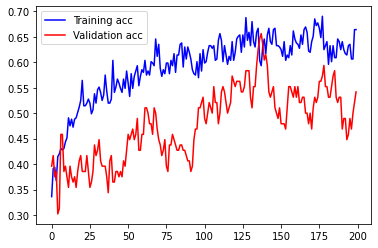

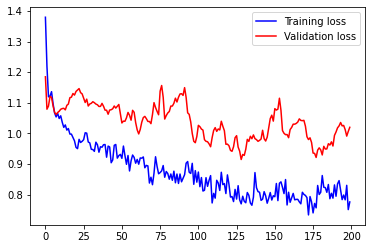

Epoch 1/200
2/2 [==============================] - 1s 427ms/step - loss: 1.8142 - accuracy: 0.2887 - val_loss: 1.4224 - val_accuracy: 0.3542
Epoch 2/200
2/2 [==============================] - 0s 27ms/step - loss: 1.4258 - accuracy: 0.3596 - val_loss: 1.1842 - val_accuracy: 0.3333
Epoch 3/200
2/2 [==============================] - 0s 27ms/step - loss: 1.2383 - accuracy: 0.3596 - val_loss: 1.4151 - val_accuracy: 0.3438
Epoch 4/200
2/2 [==============================] - 0s 43ms/step - loss: 1.3835 - accuracy: 0.3648 - val_loss: 1.2823 - val_accuracy: 0.3125
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 1.2449 - accuracy: 0.3622 - val_loss: 1.1242 - val_accuracy: 0.3750
Epoch 6/200
2/2 [==============================] - 0s 26ms/step - loss: 1.1463 - accuracy: 0.3123 - val_loss: 1.1343 - val_accuracy: 0.3438
Epoch 7/200
2/2 [==============================] - 0s 30ms/step - loss: 1.1536 - accuracy: 0.3491 - val_loss: 1.2206 - val_accuracy: 0.3333
Epoch 8/200
2/2 [==

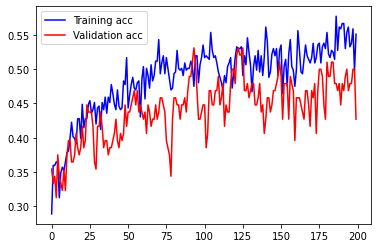

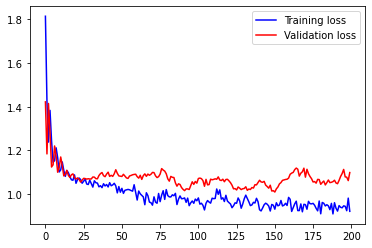

Epoch 1/200
2/2 [==============================] - 0s 148ms/step - loss: 1.3887 - accuracy: 0.3438 - val_loss: 2.1445 - val_accuracy: 0.2188
Epoch 2/200
2/2 [==============================] - 0s 27ms/step - loss: 2.0071 - accuracy: 0.2992 - val_loss: 1.3933 - val_accuracy: 0.3958
Epoch 3/200
2/2 [==============================] - 0s 30ms/step - loss: 1.5215 - accuracy: 0.3675 - val_loss: 1.1799 - val_accuracy: 0.4271
Epoch 4/200
2/2 [==============================] - 0s 23ms/step - loss: 1.3037 - accuracy: 0.3701 - val_loss: 1.3360 - val_accuracy: 0.3438
Epoch 5/200
2/2 [==============================] - 0s 26ms/step - loss: 1.2929 - accuracy: 0.3806 - val_loss: 1.2911 - val_accuracy: 0.4271
Epoch 6/200
2/2 [==============================] - 0s 29ms/step - loss: 1.3619 - accuracy: 0.3885 - val_loss: 1.1567 - val_accuracy: 0.4271
Epoch 7/200
2/2 [==============================] - 0s 29ms/step - loss: 1.2497 - accuracy: 0.4121 - val_loss: 1.1797 - val_accuracy: 0.3854
Epoch 8/200
2/2 [==

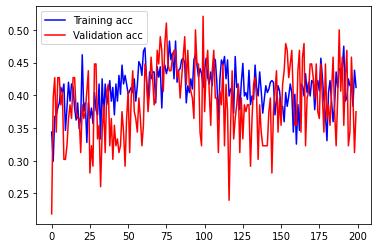

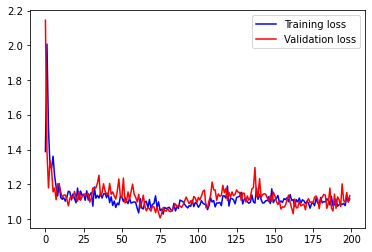

Epoch 1/200
2/2 [==============================] - 0s 159ms/step - loss: 1.9601 - accuracy: 0.3202 - val_loss: 2.8543 - val_accuracy: 0.3229
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 3.1957 - accuracy: 0.3386 - val_loss: 1.8902 - val_accuracy: 0.3333
Epoch 3/200
2/2 [==============================] - 0s 29ms/step - loss: 2.2607 - accuracy: 0.3307 - val_loss: 1.7042 - val_accuracy: 0.2604
Epoch 4/200
2/2 [==============================] - 0s 29ms/step - loss: 1.6228 - accuracy: 0.3570 - val_loss: 1.5026 - val_accuracy: 0.4062
Epoch 5/200
2/2 [==============================] - 0s 35ms/step - loss: 1.8560 - accuracy: 0.3360 - val_loss: 1.4111 - val_accuracy: 0.3542
Epoch 6/200
2/2 [==============================] - 0s 36ms/step - loss: 1.6522 - accuracy: 0.3570 - val_loss: 1.5082 - val_accuracy: 0.3125
Epoch 7/200
2/2 [==============================] - 0s 31ms/step - loss: 1.4338 - accuracy: 0.3438 - val_loss: 1.5219 - val_accuracy: 0.3229
Epoch 8/200
2/2 [==

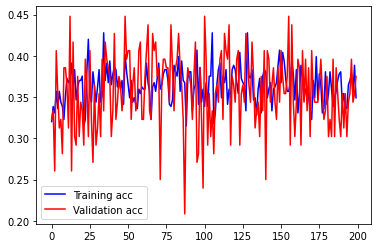

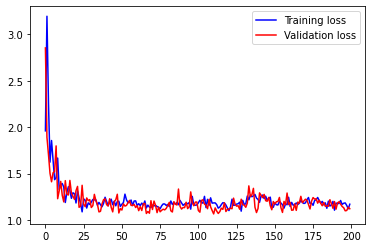

Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 149ms/step - loss: 1.3074 - accuracy: 0.3412 - val_loss: 1.2913 - val_accuracy: 0.2708
Epoch 2/200
2/2 [==============================] - 0s 30ms/step - loss: 1.2799 - accuracy: 0.3255 - val_loss: 1.2911 - val_accuracy: 0.2708
Epoch 3/200
2/2 [==============================] - 0s 24ms/step - loss: 1.3016 - accuracy: 0.3491 - val_loss: 1.2908 - val_accuracy: 0.2708
Epoch 4/200
2/2 [==============================] - 0s 26ms/step - loss: 1.3224 - accuracy: 0.3176 - val_loss: 1.2906 - val_accuracy: 0.2708
Epoch 5/200
2/2 [==============================] - 0s 27ms/step - loss: 1.2921 - accuracy: 0.3438 - val_loss: 1.2905 - val_accuracy: 0.2708
Epoch 6/200
2/2 [==============================] - 0s 25ms/step - loss: 1.2948 - accuracy: 0.3438 - val_loss: 1.2903 - val_accuracy: 0.2708
Epoch 7/200
2/2 [==============================] - 0s 27ms/step - loss: 1.2953 - accuracy: 0.3202 - val_loss: 1.2901 - val_accuracy: 0.2708
Epoch 8/200
2/2 [==============

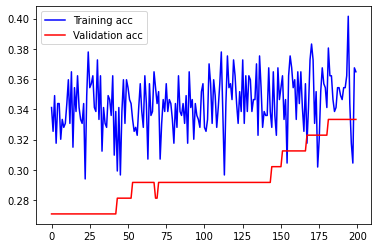

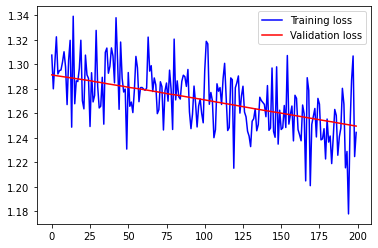

Epoch 1/200
2/2 [==============================] - 0s 147ms/step - loss: 1.3709 - accuracy: 0.2940 - val_loss: 1.2990 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 0s 58ms/step - loss: 1.3219 - accuracy: 0.3465 - val_loss: 1.2966 - val_accuracy: 0.3333
Epoch 3/200
2/2 [==============================] - 0s 32ms/step - loss: 1.2963 - accuracy: 0.3386 - val_loss: 1.2945 - val_accuracy: 0.3333
Epoch 4/200
2/2 [==============================] - 0s 26ms/step - loss: 1.3252 - accuracy: 0.3202 - val_loss: 1.2923 - val_accuracy: 0.3333
Epoch 5/200
2/2 [==============================] - 0s 45ms/step - loss: 1.3014 - accuracy: 0.3675 - val_loss: 1.2902 - val_accuracy: 0.3333
Epoch 6/200
2/2 [==============================] - 0s 27ms/step - loss: 1.3023 - accuracy: 0.3228 - val_loss: 1.2879 - val_accuracy: 0.3333
Epoch 7/200
2/2 [==============================] - 0s 28ms/step - loss: 1.2763 - accuracy: 0.3465 - val_loss: 1.2863 - val_accuracy: 0.3333
Epoch 8/200
2/2 [==

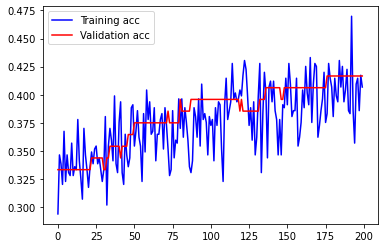

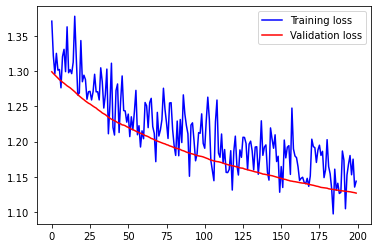

Epoch 1/200
2/2 [==============================] - 0s 153ms/step - loss: 1.3572 - accuracy: 0.3176 - val_loss: 1.2906 - val_accuracy: 0.3438
Epoch 2/200
2/2 [==============================] - 0s 44ms/step - loss: 1.3790 - accuracy: 0.3150 - val_loss: 1.2892 - val_accuracy: 0.3438
Epoch 3/200
2/2 [==============================] - 0s 30ms/step - loss: 1.3590 - accuracy: 0.3018 - val_loss: 1.2884 - val_accuracy: 0.3542
Epoch 4/200
2/2 [==============================] - 0s 28ms/step - loss: 1.2699 - accuracy: 0.3097 - val_loss: 1.2873 - val_accuracy: 0.3542
Epoch 5/200
2/2 [==============================] - 0s 30ms/step - loss: 1.3776 - accuracy: 0.3255 - val_loss: 1.2857 - val_accuracy: 0.3542
Epoch 6/200
2/2 [==============================] - 0s 27ms/step - loss: 1.3446 - accuracy: 0.3228 - val_loss: 1.2845 - val_accuracy: 0.3542
Epoch 7/200
2/2 [==============================] - 0s 28ms/step - loss: 1.3030 - accuracy: 0.3333 - val_loss: 1.2838 - val_accuracy: 0.3750
Epoch 8/200
2/2 [==

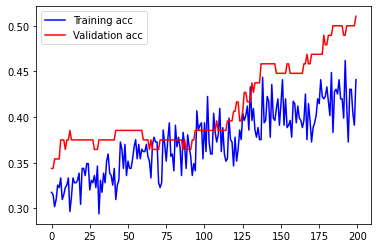

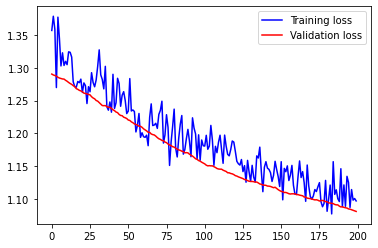

Epoch 1/200
2/2 [==============================] - 0s 151ms/step - loss: 1.4779 - accuracy: 0.3018 - val_loss: 1.3429 - val_accuracy: 0.3229
Epoch 2/200
2/2 [==============================] - 0s 30ms/step - loss: 1.4288 - accuracy: 0.3123 - val_loss: 1.3219 - val_accuracy: 0.2812
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 1.3275 - accuracy: 0.3491 - val_loss: 1.3082 - val_accuracy: 0.2812
Epoch 4/200
2/2 [==============================] - 0s 45ms/step - loss: 1.3854 - accuracy: 0.3018 - val_loss: 1.2998 - val_accuracy: 0.3021
Epoch 5/200
2/2 [==============================] - 0s 28ms/step - loss: 1.3453 - accuracy: 0.3307 - val_loss: 1.2922 - val_accuracy: 0.3021
Epoch 6/200
2/2 [==============================] - 0s 28ms/step - loss: 1.4021 - accuracy: 0.3097 - val_loss: 1.2832 - val_accuracy: 0.2812
Epoch 7/200
2/2 [==============================] - 0s 29ms/step - loss: 1.3201 - accuracy: 0.3228 - val_loss: 1.2774 - val_accuracy: 0.2812
Epoch 8/200
2/2 [==

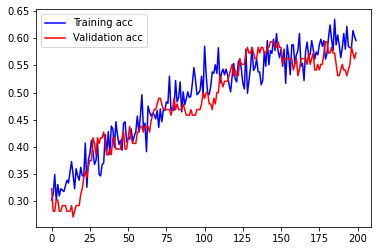

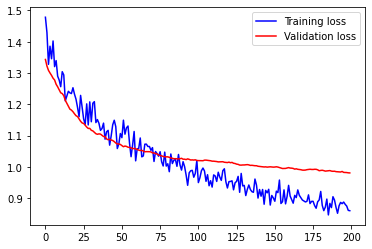

Epoch 1/200
2/2 [==============================] - 1s 241ms/step - loss: 1.2942 - accuracy: 0.3281 - val_loss: 1.1768 - val_accuracy: 0.4167
Epoch 2/200
2/2 [==============================] - 0s 41ms/step - loss: 1.2782 - accuracy: 0.3360 - val_loss: 1.1723 - val_accuracy: 0.3438
Epoch 3/200
2/2 [==============================] - 0s 44ms/step - loss: 1.2079 - accuracy: 0.3858 - val_loss: 1.1651 - val_accuracy: 0.3438
Epoch 4/200
2/2 [==============================] - 0s 32ms/step - loss: 1.2226 - accuracy: 0.3675 - val_loss: 1.1499 - val_accuracy: 0.3750
Epoch 5/200
2/2 [==============================] - 0s 26ms/step - loss: 1.2166 - accuracy: 0.3753 - val_loss: 1.1445 - val_accuracy: 0.3646
Epoch 6/200
2/2 [==============================] - 0s 29ms/step - loss: 1.1978 - accuracy: 0.3675 - val_loss: 1.1468 - val_accuracy: 0.3542
Epoch 7/200
2/2 [==============================] - 0s 27ms/step - loss: 1.2012 - accuracy: 0.3753 - val_loss: 1.1304 - val_accuracy: 0.3750
Epoch 8/200
2/2 [==

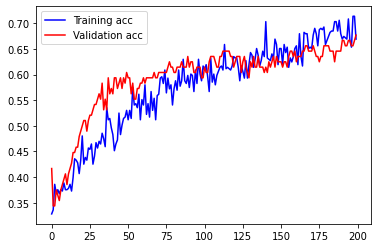

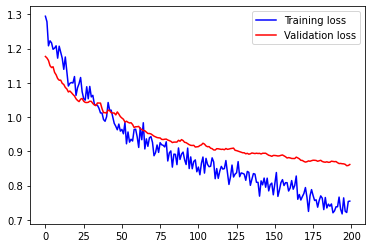

Epoch 1/200
2/2 [==============================] - 1s 159ms/step - loss: 1.3720 - accuracy: 0.3176 - val_loss: 1.2622 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 0s 29ms/step - loss: 1.2094 - accuracy: 0.3911 - val_loss: 1.2258 - val_accuracy: 0.3542
Epoch 3/200
2/2 [==============================] - 0s 29ms/step - loss: 1.2048 - accuracy: 0.3937 - val_loss: 1.1661 - val_accuracy: 0.3229
Epoch 4/200
2/2 [==============================] - 0s 30ms/step - loss: 1.1092 - accuracy: 0.4357 - val_loss: 1.0850 - val_accuracy: 0.3646
Epoch 5/200
2/2 [==============================] - 0s 52ms/step - loss: 1.1449 - accuracy: 0.4199 - val_loss: 1.0773 - val_accuracy: 0.3958
Epoch 6/200
2/2 [==============================] - 0s 42ms/step - loss: 1.0307 - accuracy: 0.4541 - val_loss: 1.0669 - val_accuracy: 0.4583
Epoch 7/200
2/2 [==============================] - 0s 29ms/step - loss: 1.0629 - accuracy: 0.4724 - val_loss: 1.0834 - val_accuracy: 0.4479
Epoch 8/200
2/2 [==

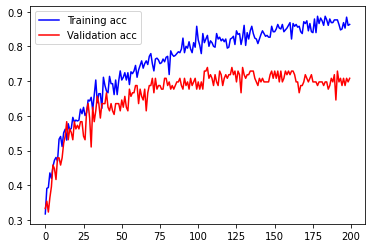

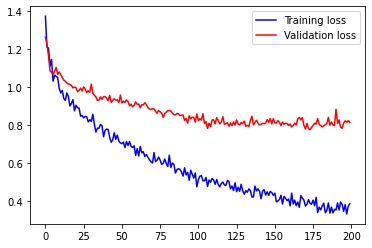

Epoch 1/200
2/2 [==============================] - 1s 184ms/step - loss: 1.2581 - accuracy: 0.3596 - val_loss: 1.1260 - val_accuracy: 0.3646
Epoch 2/200
2/2 [==============================] - 0s 35ms/step - loss: 1.1569 - accuracy: 0.4147 - val_loss: 1.1533 - val_accuracy: 0.3438
Epoch 3/200
2/2 [==============================] - 0s 30ms/step - loss: 1.1077 - accuracy: 0.4252 - val_loss: 1.1382 - val_accuracy: 0.3646
Epoch 4/200
2/2 [==============================] - 0s 27ms/step - loss: 1.0961 - accuracy: 0.4252 - val_loss: 1.0848 - val_accuracy: 0.4479
Epoch 5/200
2/2 [==============================] - 0s 46ms/step - loss: 1.0241 - accuracy: 0.5118 - val_loss: 1.0574 - val_accuracy: 0.4896
Epoch 6/200
2/2 [==============================] - 0s 29ms/step - loss: 1.0022 - accuracy: 0.5013 - val_loss: 1.0657 - val_accuracy: 0.4479
Epoch 7/200
2/2 [==============================] - 0s 51ms/step - loss: 1.0178 - accuracy: 0.4724 - val_loss: 1.1164 - val_accuracy: 0.4062
Epoch 8/200
2/2 [==

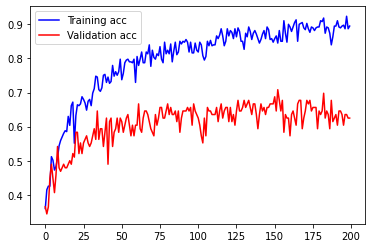

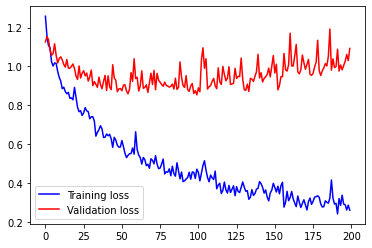

Epoch 1/200
2/2 [==============================] - 1s 216ms/step - loss: 1.5348 - accuracy: 0.3412 - val_loss: 1.4727 - val_accuracy: 0.3125
Epoch 2/200
2/2 [==============================] - 0s 26ms/step - loss: 1.3318 - accuracy: 0.3570 - val_loss: 1.0996 - val_accuracy: 0.4062
Epoch 3/200
2/2 [==============================] - 0s 44ms/step - loss: 1.1170 - accuracy: 0.4121 - val_loss: 1.1056 - val_accuracy: 0.4479
Epoch 4/200
2/2 [==============================] - 0s 49ms/step - loss: 1.0713 - accuracy: 0.4856 - val_loss: 1.0495 - val_accuracy: 0.4896
Epoch 5/200
2/2 [==============================] - 0s 31ms/step - loss: 0.9659 - accuracy: 0.5276 - val_loss: 1.0714 - val_accuracy: 0.4167
Epoch 6/200
2/2 [==============================] - 0s 47ms/step - loss: 0.9511 - accuracy: 0.5276 - val_loss: 1.0258 - val_accuracy: 0.5208
Epoch 7/200
2/2 [==============================] - 0s 30ms/step - loss: 0.9170 - accuracy: 0.5774 - val_loss: 1.0490 - val_accuracy: 0.4271
Epoch 8/200
2/2 [==

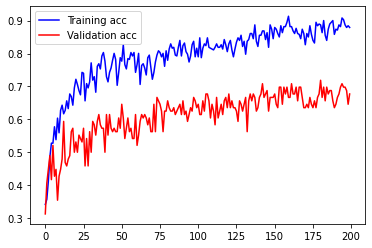

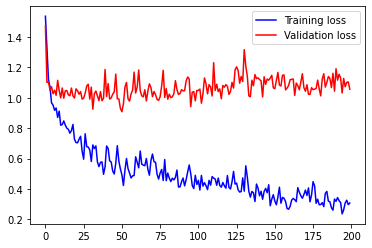

Epoch 1/200
2/2 [==============================] - 1s 198ms/step - loss: 1.4703 - accuracy: 0.2835 - val_loss: 1.0700 - val_accuracy: 0.4375
Epoch 2/200
2/2 [==============================] - 0s 50ms/step - loss: 1.1919 - accuracy: 0.3465 - val_loss: 1.1466 - val_accuracy: 0.4271
Epoch 3/200
2/2 [==============================] - 0s 47ms/step - loss: 1.1888 - accuracy: 0.4016 - val_loss: 1.2274 - val_accuracy: 0.3646
Epoch 4/200
2/2 [==============================] - 0s 30ms/step - loss: 1.1338 - accuracy: 0.4252 - val_loss: 1.0813 - val_accuracy: 0.4062
Epoch 5/200
2/2 [==============================] - 0s 46ms/step - loss: 1.0810 - accuracy: 0.4357 - val_loss: 1.1327 - val_accuracy: 0.4271
Epoch 6/200
2/2 [==============================] - 0s 27ms/step - loss: 1.0926 - accuracy: 0.4357 - val_loss: 1.2253 - val_accuracy: 0.3646
Epoch 7/200
2/2 [==============================] - 0s 31ms/step - loss: 1.0163 - accuracy: 0.4698 - val_loss: 1.0451 - val_accuracy: 0.5104
Epoch 8/200
2/2 [==

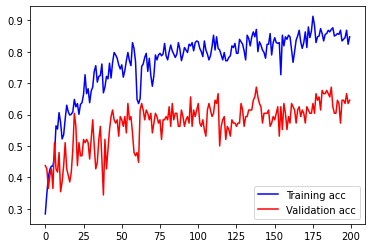

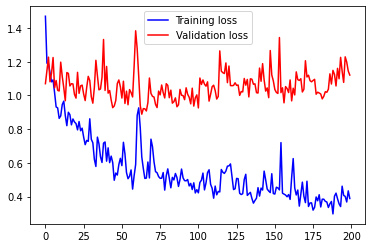

Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 183ms/step - loss: 1.3638 - accuracy: 0.3281 - val_loss: 1.2934 - val_accuracy: 0.3542
Epoch 2/200
2/2 [==============================] - 0s 36ms/step - loss: 1.2975 - accuracy: 0.3307 - val_loss: 1.2450 - val_accuracy: 0.3542
Epoch 3/200
2/2 [==============================] - 0s 28ms/step - loss: 1.2897 - accuracy: 0.3307 - val_loss: 1.2146 - val_accuracy: 0.3854
Epoch 4/200
2/2 [==============================] - 0s 47ms/step - loss: 1.2458 - accuracy: 0.3465 - val_loss: 1.1950 - val_accuracy: 0.4167
Epoch 5/200
2/2 [==============================] - 0s 31ms/step - loss: 1.2534 - accuracy: 0.3360 - val_loss: 1.1690 - val_accuracy: 0.4271
Epoch 6/200
2/2 [==============================] - 0s 45ms/step - loss: 1.2212 - accuracy: 0.3675 - val_loss: 1.1509 - val_accuracy: 0.4271
Epoch 7/200
2/2 [==============================] - 0s 47ms/step - loss: 1.1913 - accuracy: 0.3622 - val_loss: 1.1399 - val_accuracy: 0.4271
Epoch 8/200
2/2 [==============

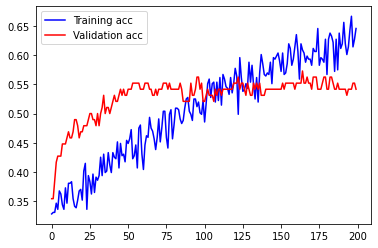

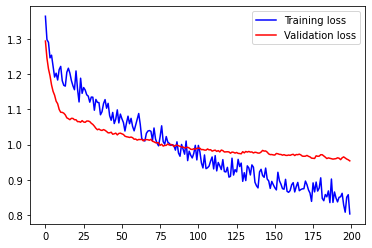

Epoch 1/200
2/2 [==============================] - 1s 185ms/step - loss: 1.3295 - accuracy: 0.3281 - val_loss: 1.3156 - val_accuracy: 0.2292
Epoch 2/200
2/2 [==============================] - 0s 49ms/step - loss: 1.2117 - accuracy: 0.3675 - val_loss: 1.2361 - val_accuracy: 0.2917
Epoch 3/200
2/2 [==============================] - 0s 46ms/step - loss: 1.1976 - accuracy: 0.3858 - val_loss: 1.1840 - val_accuracy: 0.3646
Epoch 4/200
2/2 [==============================] - 0s 32ms/step - loss: 1.1501 - accuracy: 0.4042 - val_loss: 1.1608 - val_accuracy: 0.4271
Epoch 5/200
2/2 [==============================] - 0s 32ms/step - loss: 1.1007 - accuracy: 0.4226 - val_loss: 1.1445 - val_accuracy: 0.3542
Epoch 6/200
2/2 [==============================] - 0s 29ms/step - loss: 1.0972 - accuracy: 0.4567 - val_loss: 1.1419 - val_accuracy: 0.4167
Epoch 7/200
2/2 [==============================] - 0s 27ms/step - loss: 1.0992 - accuracy: 0.4409 - val_loss: 1.1129 - val_accuracy: 0.4062
Epoch 8/200
2/2 [==

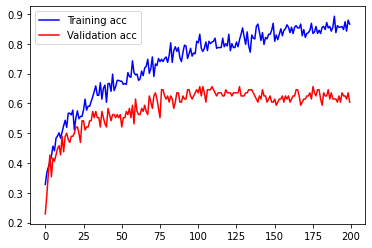

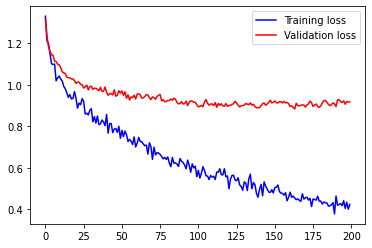

Epoch 1/200
2/2 [==============================] - 1s 190ms/step - loss: 1.2918 - accuracy: 0.3543 - val_loss: 1.2025 - val_accuracy: 0.3229
Epoch 2/200
2/2 [==============================] - 0s 29ms/step - loss: 1.1709 - accuracy: 0.3832 - val_loss: 1.0666 - val_accuracy: 0.4271
Epoch 3/200
2/2 [==============================] - 0s 45ms/step - loss: 1.1271 - accuracy: 0.4121 - val_loss: 1.0319 - val_accuracy: 0.4688
Epoch 4/200
2/2 [==============================] - 0s 34ms/step - loss: 1.1113 - accuracy: 0.4173 - val_loss: 1.1263 - val_accuracy: 0.4167
Epoch 5/200
2/2 [==============================] - 0s 27ms/step - loss: 1.1168 - accuracy: 0.4488 - val_loss: 1.0032 - val_accuracy: 0.4896
Epoch 6/200
2/2 [==============================] - 0s 45ms/step - loss: 1.0042 - accuracy: 0.4829 - val_loss: 0.9946 - val_accuracy: 0.5104
Epoch 7/200
2/2 [==============================] - 0s 28ms/step - loss: 1.0193 - accuracy: 0.5039 - val_loss: 1.0203 - val_accuracy: 0.4792
Epoch 8/200
2/2 [==

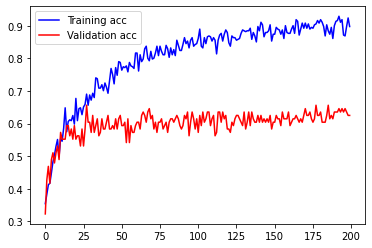

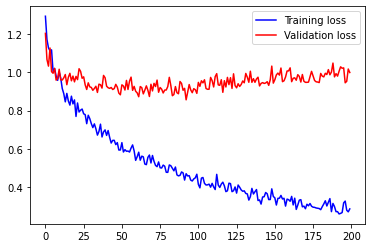

Epoch 1/200
2/2 [==============================] - 1s 551ms/step - loss: 1.2447 - accuracy: 0.3360 - val_loss: 1.0540 - val_accuracy: 0.4688
Epoch 2/200
2/2 [==============================] - 0s 32ms/step - loss: 1.0951 - accuracy: 0.4331 - val_loss: 1.0477 - val_accuracy: 0.4792
Epoch 3/200
2/2 [==============================] - 0s 46ms/step - loss: 1.0262 - accuracy: 0.4646 - val_loss: 1.0681 - val_accuracy: 0.4583
Epoch 4/200
2/2 [==============================] - 0s 27ms/step - loss: 1.0117 - accuracy: 0.4803 - val_loss: 1.0219 - val_accuracy: 0.5833
Epoch 5/200
2/2 [==============================] - 0s 27ms/step - loss: 0.9540 - accuracy: 0.5092 - val_loss: 1.0141 - val_accuracy: 0.5312
Epoch 6/200
2/2 [==============================] - 0s 36ms/step - loss: 0.9281 - accuracy: 0.5591 - val_loss: 1.0184 - val_accuracy: 0.5208
Epoch 7/200
2/2 [==============================] - 0s 46ms/step - loss: 0.9098 - accuracy: 0.5486 - val_loss: 0.9969 - val_accuracy: 0.4896
Epoch 8/200
2/2 [==

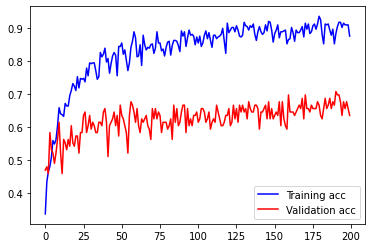

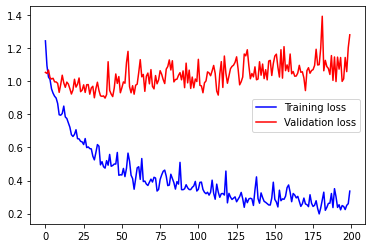

Epoch 1/200
2/2 [==============================] - 1s 198ms/step - loss: 1.6479 - accuracy: 0.3438 - val_loss: 1.5153 - val_accuracy: 0.4062
Epoch 2/200
2/2 [==============================] - 0s 39ms/step - loss: 1.4488 - accuracy: 0.4331 - val_loss: 1.2998 - val_accuracy: 0.3542
Epoch 3/200
2/2 [==============================] - 0s 31ms/step - loss: 1.2159 - accuracy: 0.4094 - val_loss: 1.1260 - val_accuracy: 0.4688
Epoch 4/200
2/2 [==============================] - 0s 48ms/step - loss: 1.0458 - accuracy: 0.4856 - val_loss: 1.0994 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 0s 45ms/step - loss: 1.0179 - accuracy: 0.4829 - val_loss: 1.0839 - val_accuracy: 0.4896
Epoch 6/200
2/2 [==============================] - 0s 32ms/step - loss: 1.0239 - accuracy: 0.4724 - val_loss: 1.1078 - val_accuracy: 0.4479
Epoch 7/200
2/2 [==============================] - 0s 28ms/step - loss: 1.0242 - accuracy: 0.5118 - val_loss: 1.0725 - val_accuracy: 0.4896
Epoch 8/200
2/2 [==

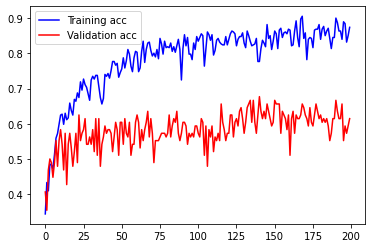

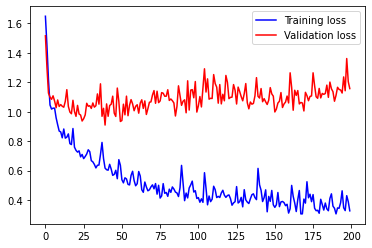

Epoch 1/200
2/2 [==============================] - 1s 229ms/step - loss: 1.5755 - accuracy: 0.3517 - val_loss: 1.3186 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 0s 47ms/step - loss: 1.2378 - accuracy: 0.3832 - val_loss: 1.2256 - val_accuracy: 0.2917
Epoch 3/200
2/2 [==============================] - 0s 53ms/step - loss: 1.1630 - accuracy: 0.3675 - val_loss: 1.1382 - val_accuracy: 0.2917
Epoch 4/200
2/2 [==============================] - 0s 45ms/step - loss: 1.1190 - accuracy: 0.3648 - val_loss: 1.1168 - val_accuracy: 0.3854
Epoch 5/200
2/2 [==============================] - 0s 49ms/step - loss: 1.0787 - accuracy: 0.4383 - val_loss: 1.1273 - val_accuracy: 0.4062
Epoch 6/200
2/2 [==============================] - 0s 32ms/step - loss: 1.0538 - accuracy: 0.4698 - val_loss: 1.1644 - val_accuracy: 0.3646
Epoch 7/200
2/2 [==============================] - 0s 30ms/step - loss: 1.0838 - accuracy: 0.3963 - val_loss: 1.1224 - val_accuracy: 0.3750
Epoch 8/200
2/2 [==

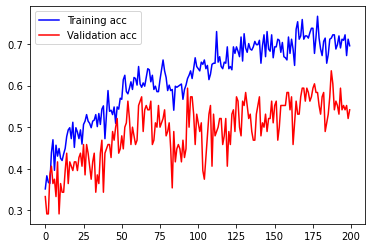

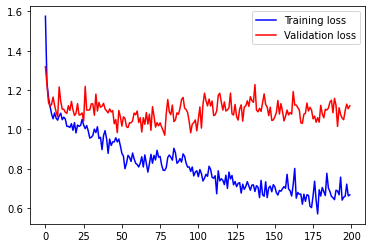

Epoch 1/200
2/2 [==============================] - 1s 185ms/step - loss: 1.3363 - accuracy: 0.3543 - val_loss: 2.3355 - val_accuracy: 0.3438
Epoch 2/200
2/2 [==============================] - 0s 30ms/step - loss: 2.0599 - accuracy: 0.3097 - val_loss: 1.1714 - val_accuracy: 0.3750
Epoch 3/200
2/2 [==============================] - 0s 29ms/step - loss: 1.2342 - accuracy: 0.3622 - val_loss: 1.1766 - val_accuracy: 0.3958
Epoch 4/200
2/2 [==============================] - 0s 33ms/step - loss: 1.2682 - accuracy: 0.3491 - val_loss: 1.1736 - val_accuracy: 0.3542
Epoch 5/200
2/2 [==============================] - 0s 27ms/step - loss: 1.1577 - accuracy: 0.3832 - val_loss: 1.1265 - val_accuracy: 0.3542
Epoch 6/200
2/2 [==============================] - 0s 44ms/step - loss: 1.0972 - accuracy: 0.3806 - val_loss: 1.1765 - val_accuracy: 0.3542
Epoch 7/200
2/2 [==============================] - 0s 39ms/step - loss: 1.2123 - accuracy: 0.3675 - val_loss: 1.2815 - val_accuracy: 0.2812
Epoch 8/200
2/2 [==

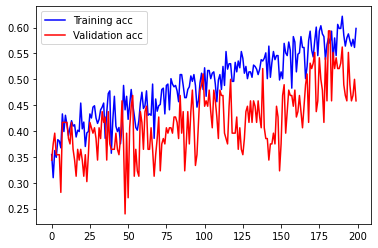

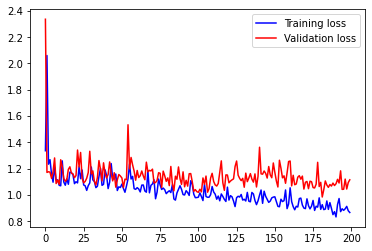

Epoch 1/200
2/2 [==============================] - 1s 196ms/step - loss: 3.2382 - accuracy: 0.3307 - val_loss: 6.4363 - val_accuracy: 0.3646
Epoch 2/200
2/2 [==============================] - 0s 46ms/step - loss: 4.9019 - accuracy: 0.3596 - val_loss: 3.9275 - val_accuracy: 0.3333
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 4.2216 - accuracy: 0.3176 - val_loss: 2.9121 - val_accuracy: 0.4479
Epoch 4/200
2/2 [==============================] - 0s 47ms/step - loss: 3.3478 - accuracy: 0.3412 - val_loss: 2.9645 - val_accuracy: 0.2812
Epoch 5/200
2/2 [==============================] - 0s 49ms/step - loss: 3.0325 - accuracy: 0.3360 - val_loss: 2.6183 - val_accuracy: 0.3333
Epoch 6/200
2/2 [==============================] - 0s 42ms/step - loss: 2.2262 - accuracy: 0.3307 - val_loss: 2.9683 - val_accuracy: 0.3229
Epoch 7/200
2/2 [==============================] - 0s 47ms/step - loss: 2.3536 - accuracy: 0.3570 - val_loss: 1.7788 - val_accuracy: 0.3021
Epoch 8/200
2/2 [==

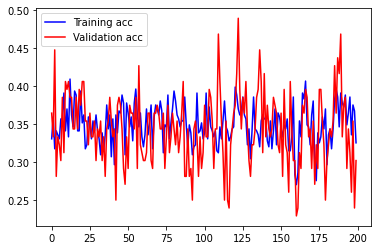

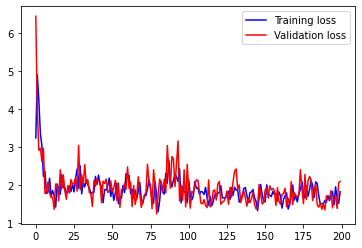

Epoch 1/200
2/2 [==============================] - 1s 187ms/step - loss: 4.8181 - accuracy: 0.3255 - val_loss: 11.2848 - val_accuracy: 0.3438
Epoch 2/200
2/2 [==============================] - 0s 35ms/step - loss: 10.7442 - accuracy: 0.3228 - val_loss: 8.1784 - val_accuracy: 0.3438
Epoch 3/200
2/2 [==============================] - 0s 46ms/step - loss: 7.5284 - accuracy: 0.3570 - val_loss: 8.3336 - val_accuracy: 0.3021
Epoch 4/200
2/2 [==============================] - 0s 27ms/step - loss: 6.6978 - accuracy: 0.3753 - val_loss: 4.1399 - val_accuracy: 0.2708
Epoch 5/200
2/2 [==============================] - 0s 32ms/step - loss: 4.1051 - accuracy: 0.3753 - val_loss: 3.8716 - val_accuracy: 0.3229
Epoch 6/200
2/2 [==============================] - 0s 47ms/step - loss: 3.7158 - accuracy: 0.3596 - val_loss: 3.7562 - val_accuracy: 0.3542
Epoch 7/200
2/2 [==============================] - 0s 50ms/step - loss: 3.9804 - accuracy: 0.3438 - val_loss: 4.1954 - val_accuracy: 0.3438
Epoch 8/200
2/2 [

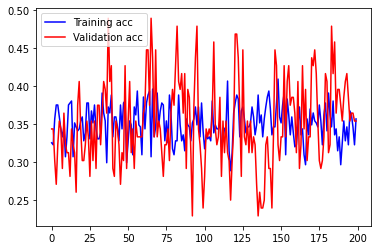

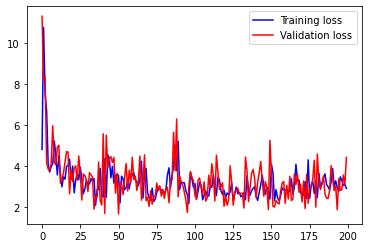

In [ ]:
var_optimizers = [Adam, SGD, RMSprop]
learning_rate = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]

for var_optimizer in var_optimizers :
  for i in learning_rate:

    model = Sequential()
    model.add(keras.layers.Flatten(input_shape=(1140,)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='tanh'))#,kernel_regularizer=regularizers.L2(0.5)))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))#,kernel_regularizer=regularizers.L1(0.05)))

    opt = var_optimizer(lr=i) # adam(0.1), SGD(lr=0.01)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #tf.keras.losses.CategoricalCrossentropy(
    #'sparse_categorical_crossentropy'

    history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=200, batch_size=256)

    ############ Plot CURVE ############
    print('__________________________________')
    print(var_optimizer,i)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    import matplotlib.pyplot as plt
    epochs = range(len(acc))
    plt.plot(epochs,acc,'b',label='Training acc')
    plt.plot(epochs,val_acc,'r',label='Validation acc')
    plt.legend();  plt.figure()
    plt.plot(epochs,loss,'b',label='Training loss')
    plt.plot(epochs,val_loss,'r',label='Validation loss')
    plt.legend();  plt.show()

In [ ]:
# Chose ADAM + 0.005
Adam0005 = build_model(var_activation='tanh',  var_optimizer=Adam,  learnRate=0.005,
                hiddenLayer=10,  dropout1=0.2,  dropout2=0.2)

history = Adam0005.fit(X_train, y_train,
                       #validation_split=0.2,
                       epochs=200, batch_size=256)

# Predict
y_pred = Adam0005.predict(X_test)
print(y_pred.argmax(axis=1))

# print model performance
cf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(cf_matrix)
print(classification_report(y_test, y_pred.argmax(axis=1)))

Epoch 1/200
2/2 [==============================] - 0s 7ms/step - loss: 1.6552 - accuracy: 0.3711
Epoch 2/200
2/2 [==============================] - 0s 6ms/step - loss: 1.4281 - accuracy: 0.4025
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 1.1208 - accuracy: 0.4612
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 1.1363 - accuracy: 0.4696
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 1.0367 - accuracy: 0.5010
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 1.0434 - accuracy: 0.4654
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 0.9359 - accuracy: 0.5367
Epoch 8/200
2/2 [==============================] - 0s 7ms/step - loss: 0.9662 - accuracy: 0.5199
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 0.9520 - accuracy: 0.5325
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 0.8497 - accuracy: 0.6080
Epoch 11/200
2/2 [===========

# Best score is: 0.65 using {RMSprop'relu', 'learnRate': 0.005, 'hiddenLayer': 14, 'dropout2': 0.1, 'dropout1': 0.1}

Epoch 1/300
2/2 [==============================] - 1s 143ms/step - loss: 1.9439 - accuracy: 0.3202 - val_loss: 2.4622 - val_accuracy: 0.4167
Epoch 2/300
2/2 [==============================] - 0s 22ms/step - loss: 2.1971 - accuracy: 0.3622 - val_loss: 1.9160 - val_accuracy: 0.2917
Epoch 3/300
2/2 [==============================] - 0s 20ms/step - loss: 1.5665 - accuracy: 0.4541 - val_loss: 1.6192 - val_accuracy: 0.4479
Epoch 4/300
2/2 [==============================] - 0s 21ms/step - loss: 1.4846 - accuracy: 0.4646 - val_loss: 1.2534 - val_accuracy: 0.5208
Epoch 5/300
2/2 [==============================] - 0s 21ms/step - loss: 1.3052 - accuracy: 0.4777 - val_loss: 1.4158 - val_accuracy: 0.4062
Epoch 6/300
2/2 [==============================] - 0s 21ms/step - loss: 1.1396 - accuracy: 0.5039 - val_loss: 1.1189 - val_accuracy: 0.4479
Epoch 7/300
2/2 [==============================] - 0s 22ms/step - loss: 1.0343 - accuracy: 0.5591 - val_loss: 1.1624 - val_accuracy: 0.4688
Epoch 8/300
2/2 [==

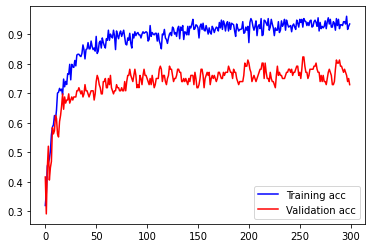

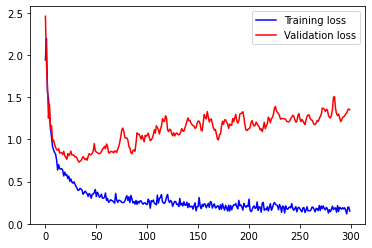

4/4 [==============================] - 0s 2ms/step
0


AxisError: ignored

In [ ]:
model2 = build_model(var_activation='relu',  var_optimizer=RMSprop,  learnRate=0.005,
                hiddenLayer=14,  dropout1=0.1,  dropout2=0.1)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300, batch_size=256)

# Plot CURVE
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
epochs = range(len(acc))
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend()
plt.show()

# Predict
y_pred = model.predict(X_test)

print(np.sum(y_pred[0]))

print(y_pred.argmax(axis=1))

# print model performance

cf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(cf_matrix)

print(classification_report(y_test, y_pred.argmax(axis=1)))

Epoch 1/300
2/2 [==============================] - 1s 157ms/step - loss: 1.1943 - accuracy: 0.3255 - val_loss: 1.1231 - val_accuracy: 0.3229
Epoch 2/300
2/2 [==============================] - 0s 23ms/step - loss: 1.1634 - accuracy: 0.3333 - val_loss: 1.0768 - val_accuracy: 0.4167
Epoch 3/300
2/2 [==============================] - 0s 22ms/step - loss: 1.1086 - accuracy: 0.4042 - val_loss: 1.1143 - val_accuracy: 0.3333
Epoch 4/300
2/2 [==============================] - 0s 22ms/step - loss: 1.1546 - accuracy: 0.3412 - val_loss: 1.0955 - val_accuracy: 0.3854
Epoch 5/300
2/2 [==============================] - 0s 21ms/step - loss: 1.1143 - accuracy: 0.3465 - val_loss: 1.0873 - val_accuracy: 0.4271
Epoch 6/300
2/2 [==============================] - 0s 21ms/step - loss: 1.1027 - accuracy: 0.3911 - val_loss: 1.0953 - val_accuracy: 0.3542
Epoch 7/300
2/2 [==============================] - 0s 22ms/step - loss: 1.0896 - accuracy: 0.4042 - val_loss: 1.0805 - val_accuracy: 0.4375
Epoch 8/300
2/2 [==

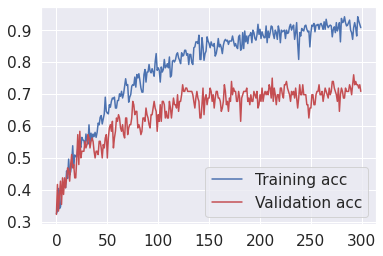

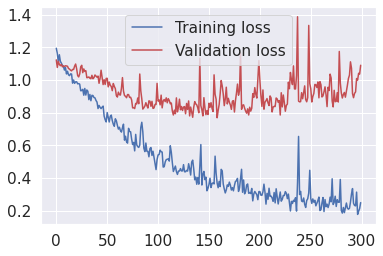

Epoch 1/300
2/2 [==============================] - 0s 8ms/step - loss: 0.3709 - accuracy: 0.8805
Epoch 2/300
2/2 [==============================] - 0s 7ms/step - loss: 0.3831 - accuracy: 0.9015
Epoch 3/300
2/2 [==============================] - 0s 7ms/step - loss: 0.4486 - accuracy: 0.8365
Epoch 4/300
2/2 [==============================] - 0s 14ms/step - loss: 0.3959 - accuracy: 0.8637
Epoch 5/300
2/2 [==============================] - 0s 6ms/step - loss: 0.3295 - accuracy: 0.9140
Epoch 6/300
2/2 [==============================] - 0s 7ms/step - loss: 0.3134 - accuracy: 0.8889
Epoch 7/300
2/2 [==============================] - 0s 7ms/step - loss: 0.3846 - accuracy: 0.8700
Epoch 8/300
2/2 [==============================] - 0s 7ms/step - loss: 0.3177 - accuracy: 0.8889
Epoch 9/300
2/2 [==============================] - 0s 7ms/step - loss: 0.3378 - accuracy: 0.8910
Epoch 10/300
2/2 [==============================] - 0s 7ms/step - loss: 0.3289 - accuracy: 0.8868
Epoch 11/300
2/2 [==========

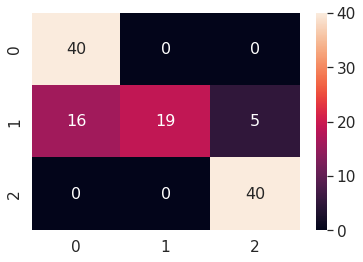

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


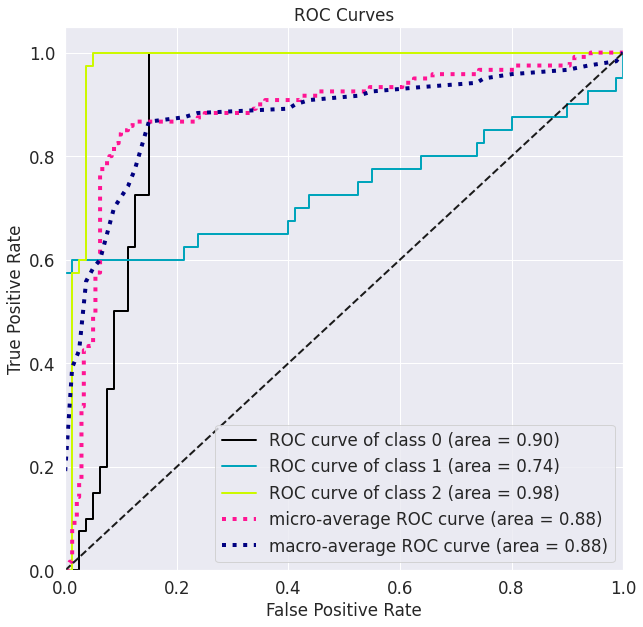

In [ ]:
model = build_model(var_optimizer = SGD, learnRate = 0.1,
var_activation2 = 'relu', var_activation1 = 'relu' , hiddenLayer2 = 18, hiddenLayer1 = 18,
dropout3 = 0.1, dropout2 = 0.2, dropout1 = 0.2
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300, batch_size=256)

# Plot CURVE
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
epochs = range(len(acc))
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend()
plt.show()

# fit with the hold training set
history = model.fit(
    X_train, y_train,
    epochs=300, batch_size=256)

# Predict
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba.argmax(axis=1)

# print model performance

#cf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
#print(cf_matrix)
#df_df = pd.DataFrame(cf_matrix, range(3), range(3))
#sns.set(font_scale=1.4) # for label size
#sns.heatmap(df_df, annot=True, annot_kws={"size": 16}) # font size
#plt.show()

#print(classification_report(y_test, y_pred.argmax(axis=1)))

combination_measurement(y_pred,y_pred_proba)

# RELU + RMS

Epoch 1/300


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 156ms/step - loss: 1.5183 - accuracy: 0.2808 - val_loss: 1.2009 - val_accuracy: 0.3750
Epoch 2/300
2/2 [==============================] - 0s 21ms/step - loss: 1.3811 - accuracy: 0.3858 - val_loss: 1.2466 - val_accuracy: 0.3854
Epoch 3/300
2/2 [==============================] - 0s 21ms/step - loss: 1.2192 - accuracy: 0.3937 - val_loss: 1.1079 - val_accuracy: 0.3542
Epoch 4/300
2/2 [==============================] - 0s 41ms/step - loss: 1.1811 - accuracy: 0.4173 - val_loss: 1.1225 - val_accuracy: 0.4479
Epoch 5/300
2/2 [==============================] - 0s 31ms/step - loss: 1.2200 - accuracy: 0.3990 - val_loss: 1.0063 - val_accuracy: 0.4688
Epoch 6/300
2/2 [==============================] - 0s 23ms/step - loss: 1.1234 - accuracy: 0.4488 - val_loss: 1.1060 - val_accuracy: 0.3854
Epoch 7/300
2/2 [==============================] - 0s 22ms/step - loss: 1.0643 - accuracy: 0.4724 - val_loss: 0.9959 - val_accuracy: 0.4479
Epoch 8/300
2/2 [==============

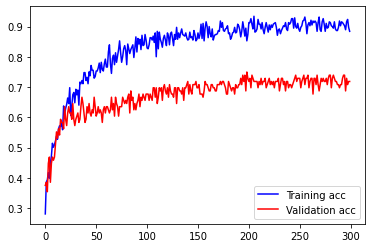

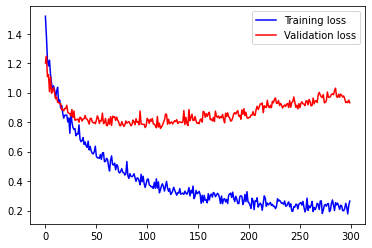

4/4 [==============================] - 0s 3ms/step
0.99999994
[0 0 0 2 0 1 0 2 1 1 0 0 2 0 1 1 2 2 2 2 0 2 2 0 0 1 2 0 2 2 2 2 2 0 2 0 2
 2 1 0 2 2 0 0 0 0 0 1 1 1 2 2 2 0 0 2 2 0 2 2 1 2 2 2 0 0 2 0 0 2 2 2 2 2
 0 0 2 2 0 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 1 0 0 2 0 2 0 2 0 0 0 1 0 0 2
 2 2 0 2 2 0 2 0 0]
[[40  0  0]
 [15 13 12]
 [ 1  0 39]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        40
           1       1.00      0.33      0.49        40
           2       0.76      0.97      0.86        40

    accuracy                           0.77       120
   macro avg       0.83      0.77      0.73       120
weighted avg       0.83      0.77      0.73       120



In [ ]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(1140,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))#,kernel_regularizer=regularizers.L2(0.5)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))#,kernel_regularizer=regularizers.L1(0.05)))

opt = RMSprop(lr=0.001) # adam(0.1), SGD(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#tf.keras.losses.CategoricalCrossentropy(
#'sparse_categorical_crossentropy'

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300, batch_size=256)

# Plot CURVE
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
epochs = range(len(acc))
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend()
plt.show()

# Predict
y_pred = model.predict(X_test)

print(np.sum(y_pred[0]))

print(y_pred.argmax(axis=1))

# print model performance

cf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(cf_matrix)

print(classification_report(y_test, y_pred.argmax(axis=1)))

# SELU + SGD

Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 134ms/step - loss: 2.0521 - accuracy: 0.3386 - val_loss: 1.9977 - val_accuracy: 0.2917
Epoch 2/200
2/2 [==============================] - 0s 20ms/step - loss: 2.0097 - accuracy: 0.3701 - val_loss: 1.9432 - val_accuracy: 0.2917
Epoch 3/200
2/2 [==============================] - 0s 20ms/step - loss: 1.9685 - accuracy: 0.3333 - val_loss: 1.8956 - val_accuracy: 0.2917
Epoch 4/200
2/2 [==============================] - 0s 20ms/step - loss: 1.7957 - accuracy: 0.3517 - val_loss: 1.8580 - val_accuracy: 0.2917
Epoch 5/200
2/2 [==============================] - 0s 21ms/step - loss: 1.8023 - accuracy: 0.3412 - val_loss: 1.8218 - val_accuracy: 0.2812
Epoch 6/200
2/2 [==============================] - 0s 21ms/step - loss: 1.7805 - accuracy: 0.3806 - val_loss: 1.7876 - val_accuracy: 0.2917
Epoch 7/200
2/2 [==============================] - 0s 23ms/step - loss: 1.7853 - accuracy: 0.3570 - val_loss: 1.7597 - val_accuracy: 0.2917
Epoch 8/200
2/2 [==============

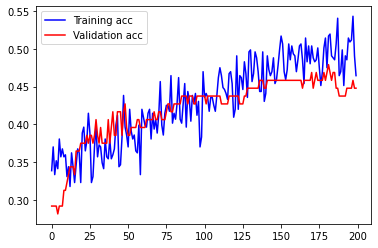

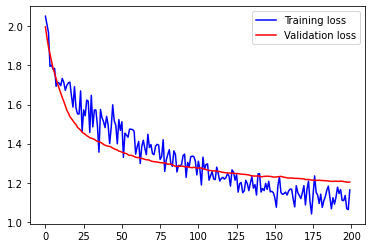

Epoch 1/200
2/2 [==============================] - 0s 144ms/step - loss: 1.8767 - accuracy: 0.3438 - val_loss: 1.3924 - val_accuracy: 0.3438
Epoch 2/200
2/2 [==============================] - 0s 22ms/step - loss: 1.6414 - accuracy: 0.3438 - val_loss: 1.4467 - val_accuracy: 0.3542
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 1.4693 - accuracy: 0.4068 - val_loss: 1.3597 - val_accuracy: 0.3438
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 1.4190 - accuracy: 0.3990 - val_loss: 1.2782 - val_accuracy: 0.4167
Epoch 5/200
2/2 [==============================] - 0s 21ms/step - loss: 1.3930 - accuracy: 0.4094 - val_loss: 1.2652 - val_accuracy: 0.4375
Epoch 6/200
2/2 [==============================] - 0s 21ms/step - loss: 1.3535 - accuracy: 0.4199 - val_loss: 1.2486 - val_accuracy: 0.4167
Epoch 7/200
2/2 [==============================] - 0s 21ms/step - loss: 1.3168 - accuracy: 0.4409 - val_loss: 1.2611 - val_accuracy: 0.4271
Epoch 8/200
2/2 [==

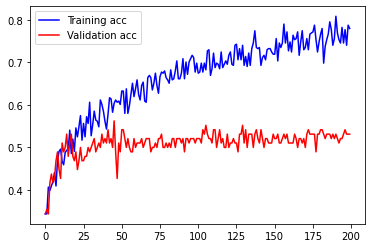

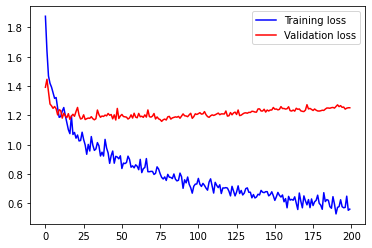

Epoch 1/200
2/2 [==============================] - 0s 136ms/step - loss: 2.5415 - accuracy: 0.3150 - val_loss: 4.4909 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 0s 21ms/step - loss: 3.2703 - accuracy: 0.3596 - val_loss: 3.1681 - val_accuracy: 0.3125
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 2.8430 - accuracy: 0.4094 - val_loss: 1.8089 - val_accuracy: 0.3750
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 1.5087 - accuracy: 0.4436 - val_loss: 1.2426 - val_accuracy: 0.3438
Epoch 5/200
2/2 [==============================] - 0s 22ms/step - loss: 1.1594 - accuracy: 0.4567 - val_loss: 1.2085 - val_accuracy: 0.3750
Epoch 6/200
2/2 [==============================] - 0s 22ms/step - loss: 0.9577 - accuracy: 0.5748 - val_loss: 1.0723 - val_accuracy: 0.4792
Epoch 7/200
2/2 [==============================] - 0s 22ms/step - loss: 0.8930 - accuracy: 0.5696 - val_loss: 1.0499 - val_accuracy: 0.4688
Epoch 8/200
2/2 [==

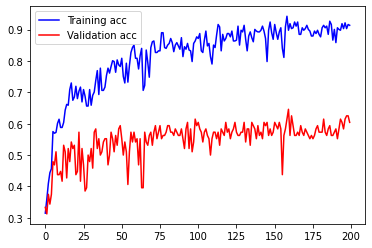

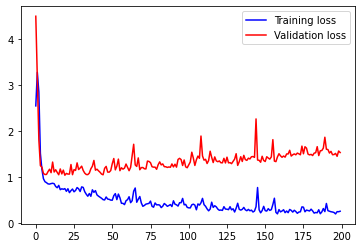

Epoch 1/200
2/2 [==============================] - 0s 140ms/step - loss: 5.6577 - accuracy: 0.3648 - val_loss: 1153.0721 - val_accuracy: 0.2812
Epoch 2/200
2/2 [==============================] - 0s 23ms/step - loss: 5969.7881 - accuracy: 0.3307 - val_loss: 233194.5156 - val_accuracy: 0.3229
Epoch 3/200
2/2 [==============================] - 0s 23ms/step - loss: 2246399.2500 - accuracy: 0.3228 - val_loss: 84706312.0000 - val_accuracy: 0.3125
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 1879247232.0000 - accuracy: 0.3097 - val_loss: 113345191936.0000 - val_accuracy: 0.2708
Epoch 5/200
2/2 [==============================] - 0s 27ms/step - loss: 902923878400.0000 - accuracy: 0.3123 - val_loss: 23171587637248.0000 - val_accuracy: 0.2917
Epoch 6/200
2/2 [==============================] - 0s 26ms/step - loss: 364302447935488.0000 - accuracy: 0.3570 - val_loss: 24259469936427008.0000 - val_accuracy: 0.3229
Epoch 7/200
2/2 [==============================] - 0s 23ms/st

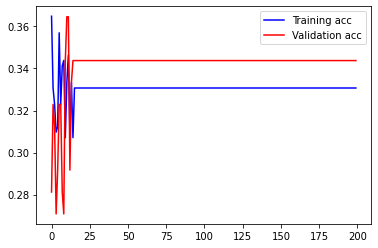

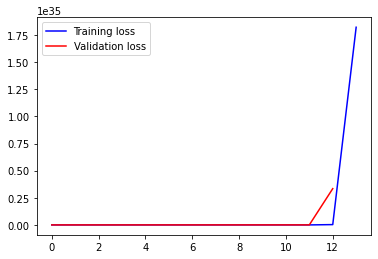

In [ ]:
learning_rate = [0.001,0.01,0.1,1]

for i in learning_rate:
  print('__________________________________')
  print(i)
  model = Sequential()
  model.add(keras.layers.Flatten(input_shape=(1140,)))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='selu'))#,kernel_regularizer=regularizers.L2(0.5)))
  model.add(Dropout(0.2))
  model.add(Dense(3, activation='softmax'))#,kernel_regularizer=regularizers.L1(0.05)))

  opt = SGD(lr=i) # adam(0.1), SGD(lr=0.01)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  #tf.keras.losses.CategoricalCrossentropy(
  #'sparse_categorical_crossentropy'

  history = model.fit(
      X_train, y_train,
      validation_split=0.2,
      epochs=200, batch_size=256)

  ############ Plot CURVE ############
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  import matplotlib.pyplot as plt
  epochs = range(len(acc))
  plt.plot(epochs,acc,'b',label='Training acc')
  plt.plot(epochs,val_acc,'r',label='Validation acc')
  plt.legend()
  plt.figure()
  plt.plot(epochs,loss,'b',label='Training loss')
  plt.plot(epochs,val_loss,'r',label='Validation loss')
  plt.legend()
  plt.show()

Epoch 1/300
2/2 [==============================] - 1s 534ms/step - loss: 1.8592 - accuracy: 0.3071 - val_loss: 1.4180 - val_accuracy: 0.4167
Epoch 2/300
2/2 [==============================] - 0s 58ms/step - loss: 1.8504 - accuracy: 0.3228 - val_loss: 1.4087 - val_accuracy: 0.4271
Epoch 3/300
2/2 [==============================] - 0s 50ms/step - loss: 1.8076 - accuracy: 0.2835 - val_loss: 1.4019 - val_accuracy: 0.4375
Epoch 4/300
2/2 [==============================] - 0s 21ms/step - loss: 1.8472 - accuracy: 0.2913 - val_loss: 1.3959 - val_accuracy: 0.4479
Epoch 5/300
2/2 [==============================] - 0s 20ms/step - loss: 1.8240 - accuracy: 0.3045 - val_loss: 1.3840 - val_accuracy: 0.4271
Epoch 6/300
2/2 [==============================] - 0s 20ms/step - loss: 1.8504 - accuracy: 0.3071 - val_loss: 1.3763 - val_accuracy: 0.4271
Epoch 7/300
2/2 [==============================] - 0s 39ms/step - loss: 1.7953 - accuracy: 0.2887 - val_loss: 1.3619 - val_accuracy: 0.4167
Epoch 8/300
2/2 [==

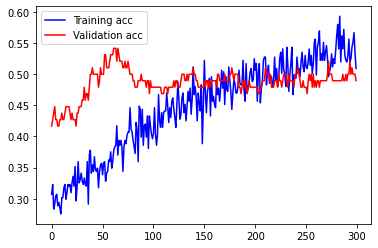

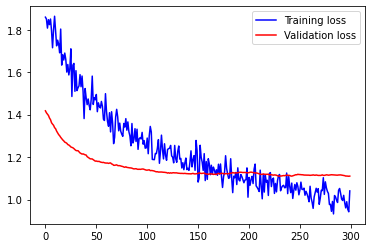

In [ ]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(1140,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='selu'))#,kernel_regularizer=regularizers.L2(0.5)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))#,kernel_regularizer=regularizers.L1(0.05)))

opt = SGD(lr=0.001) # adam(0.1), SGD(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#tf.keras.losses.CategoricalCrossentropy(
#'sparse_categorical_crossentropy'

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300, batch_size=256)

############ Plot CURVE ############
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
epochs = range(len(acc))
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend()
plt.show()

# SELU + ADAM

_______________________________________________________
LEARNING RATE:
0.001
Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 138ms/step - loss: 1.8944 - accuracy: 0.2808 - val_loss: 1.4461 - val_accuracy: 0.2500
Epoch 2/200
2/2 [==============================] - 0s 20ms/step - loss: 1.7109 - accuracy: 0.3228 - val_loss: 1.3147 - val_accuracy: 0.3125
Epoch 3/200
2/2 [==============================] - 0s 21ms/step - loss: 1.4449 - accuracy: 0.3885 - val_loss: 1.2980 - val_accuracy: 0.4062
Epoch 4/200
2/2 [==============================] - 0s 21ms/step - loss: 1.4070 - accuracy: 0.3806 - val_loss: 1.2865 - val_accuracy: 0.3854
Epoch 5/200
2/2 [==============================] - 0s 20ms/step - loss: 1.3543 - accuracy: 0.3937 - val_loss: 1.2099 - val_accuracy: 0.3958
Epoch 6/200
2/2 [==============================] - 0s 22ms/step - loss: 1.2186 - accuracy: 0.4541 - val_loss: 1.2010 - val_accuracy: 0.4167
Epoch 7/200
2/2 [==============================] - 0s 20ms/step - loss: 1.2577 - accuracy: 0.4462 - val_loss: 1.2150 - val_accuracy: 0.3958
Epoch 8/200
2/2 [==============

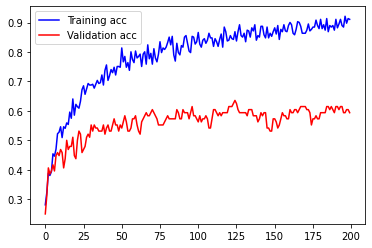

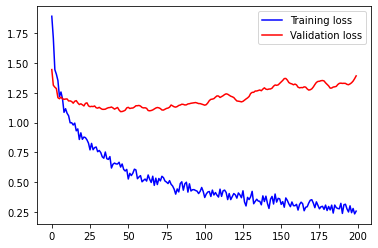

_______________________________________________________
LEARNING RATE:
0.005
Epoch 1/200
2/2 [==============================] - 0s 145ms/step - loss: 2.4575 - accuracy: 0.3228 - val_loss: 2.2660 - val_accuracy: 0.3229
Epoch 2/200
2/2 [==============================] - 0s 23ms/step - loss: 2.1111 - accuracy: 0.4016 - val_loss: 2.1194 - val_accuracy: 0.4271
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 1.7674 - accuracy: 0.4541 - val_loss: 1.7265 - val_accuracy: 0.3958
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 1.3434 - accuracy: 0.5092 - val_loss: 1.7308 - val_accuracy: 0.3542
Epoch 5/200
2/2 [==============================] - 0s 23ms/step - loss: 1.4036 - accuracy: 0.5302 - val_loss: 1.6449 - val_accuracy: 0.3646
Epoch 6/200
2/2 [==============================] - 0s 22ms/step - loss: 1.1050 - accuracy: 0.5512 - val_loss: 1.6483 - val_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 23ms/step - loss: 1.1345 - a

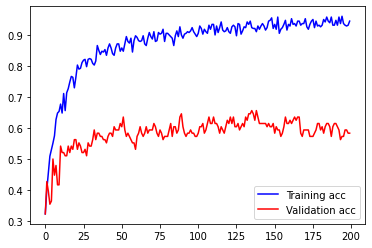

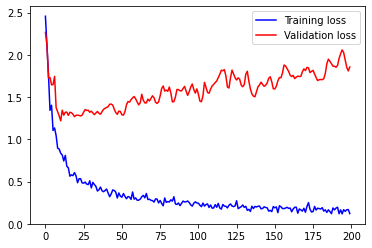

_______________________________________________________
LEARNING RATE:
0.01
Epoch 1/200
2/2 [==============================] - 0s 143ms/step - loss: 3.2053 - accuracy: 0.3675 - val_loss: 4.8806 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 3.3228 - accuracy: 0.4199 - val_loss: 2.3927 - val_accuracy: 0.3646
Epoch 3/200
2/2 [==============================] - 0s 24ms/step - loss: 2.2014 - accuracy: 0.4856 - val_loss: 3.1384 - val_accuracy: 0.3333
Epoch 4/200
2/2 [==============================] - 0s 23ms/step - loss: 1.9976 - accuracy: 0.4987 - val_loss: 2.0625 - val_accuracy: 0.5625
Epoch 5/200
2/2 [==============================] - 0s 23ms/step - loss: 1.5742 - accuracy: 0.5354 - val_loss: 2.8347 - val_accuracy: 0.4062
Epoch 6/200
2/2 [==============================] - 0s 23ms/step - loss: 1.9567 - accuracy: 0.5092 - val_loss: 2.7855 - val_accuracy: 0.4167
Epoch 7/200
2/2 [==============================] - 0s 21ms/step - loss: 1.4726 - ac

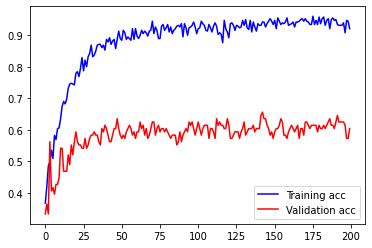

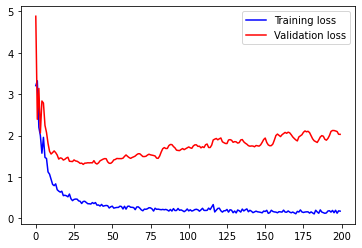

_______________________________________________________
LEARNING RATE:
0.05
Epoch 1/200
2/2 [==============================] - 0s 147ms/step - loss: 5.3448 - accuracy: 0.2940 - val_loss: 10.0081 - val_accuracy: 0.3542
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 9.1760 - accuracy: 0.3648 - val_loss: 5.2292 - val_accuracy: 0.3646
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 4.1518 - accuracy: 0.4514 - val_loss: 4.1990 - val_accuracy: 0.3333
Epoch 4/200
2/2 [==============================] - 0s 24ms/step - loss: 3.1467 - accuracy: 0.4462 - val_loss: 3.0897 - val_accuracy: 0.3333
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 2.2232 - accuracy: 0.4383 - val_loss: 1.6266 - val_accuracy: 0.3542
Epoch 6/200
2/2 [==============================] - 0s 26ms/step - loss: 1.8596 - accuracy: 0.4226 - val_loss: 1.8996 - val_accuracy: 0.3125
Epoch 7/200
2/2 [==============================] - 0s 22ms/step - loss: 1.9148 - a

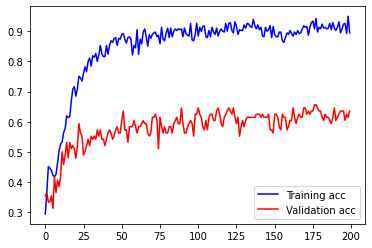

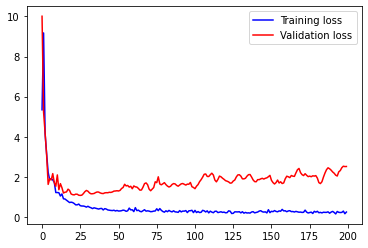

_______________________________________________________
LEARNING RATE:
0.1
Epoch 1/200
2/2 [==============================] - 0s 150ms/step - loss: 10.0316 - accuracy: 0.3412 - val_loss: 23.3893 - val_accuracy: 0.3646
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 27.0999 - accuracy: 0.3753 - val_loss: 11.5413 - val_accuracy: 0.3958
Epoch 3/200
2/2 [==============================] - 0s 21ms/step - loss: 10.8120 - accuracy: 0.4068 - val_loss: 9.0572 - val_accuracy: 0.3542
Epoch 4/200
2/2 [==============================] - 0s 23ms/step - loss: 9.0753 - accuracy: 0.3753 - val_loss: 5.0142 - val_accuracy: 0.3125
Epoch 5/200
2/2 [==============================] - 0s 22ms/step - loss: 6.2740 - accuracy: 0.3491 - val_loss: 4.8131 - val_accuracy: 0.3229
Epoch 6/200
2/2 [==============================] - 0s 23ms/step - loss: 5.1447 - accuracy: 0.3832 - val_loss: 4.6972 - val_accuracy: 0.3333
Epoch 7/200
2/2 [==============================] - 0s 22ms/step - loss: 5.2743 

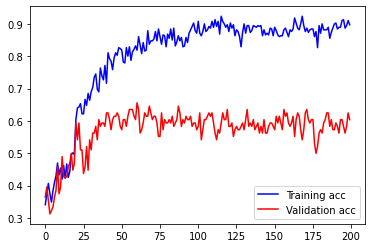

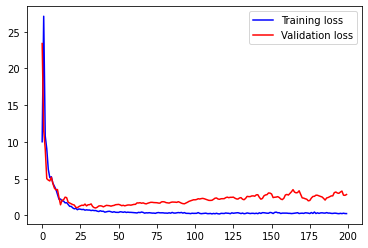

_______________________________________________________
LEARNING RATE:
0.5
Epoch 1/200
2/2 [==============================] - 0s 144ms/step - loss: 47.8932 - accuracy: 0.3307 - val_loss: 253.0464 - val_accuracy: 0.3229
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 248.0125 - accuracy: 0.3386 - val_loss: 199.9973 - val_accuracy: 0.2917
Epoch 3/200
2/2 [==============================] - 0s 24ms/step - loss: 214.6540 - accuracy: 0.3727 - val_loss: 106.0757 - val_accuracy: 0.3021
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 99.1167 - accuracy: 0.4147 - val_loss: 54.6056 - val_accuracy: 0.4271
Epoch 5/200
2/2 [==============================] - 0s 25ms/step - loss: 58.5311 - accuracy: 0.3228 - val_loss: 88.1694 - val_accuracy: 0.2708
Epoch 6/200
2/2 [==============================] - 0s 24ms/step - loss: 69.5164 - accuracy: 0.3727 - val_loss: 106.3411 - val_accuracy: 0.3542
Epoch 7/200
2/2 [==============================] - 0s 24ms/step - 

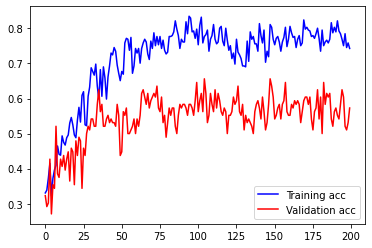

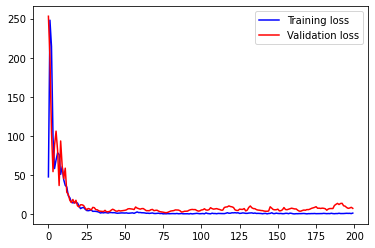

_______________________________________________________
LEARNING RATE:
1
Epoch 1/200
2/2 [==============================] - 0s 146ms/step - loss: 490.5051 - accuracy: 0.3150 - val_loss: 1701.2832 - val_accuracy: 0.3438
Epoch 2/200
2/2 [==============================] - 0s 23ms/step - loss: 1138.0759 - accuracy: 0.3675 - val_loss: 818.8396 - val_accuracy: 0.3021
Epoch 3/200
2/2 [==============================] - 0s 27ms/step - loss: 749.9175 - accuracy: 0.3701 - val_loss: 628.9789 - val_accuracy: 0.3854
Epoch 4/200
2/2 [==============================] - 0s 24ms/step - loss: 507.3132 - accuracy: 0.4199 - val_loss: 589.3184 - val_accuracy: 0.3333
Epoch 5/200
2/2 [==============================] - 0s 27ms/step - loss: 559.6292 - accuracy: 0.3990 - val_loss: 364.5423 - val_accuracy: 0.3542
Epoch 6/200
2/2 [==============================] - 0s 24ms/step - loss: 454.5785 - accuracy: 0.3937 - val_loss: 451.8620 - val_accuracy: 0.3646
Epoch 7/200
2/2 [==============================] - 0s 25ms/s

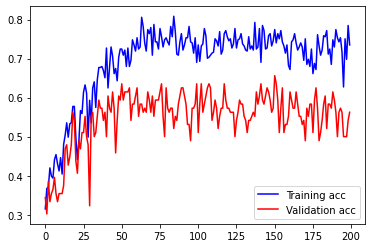

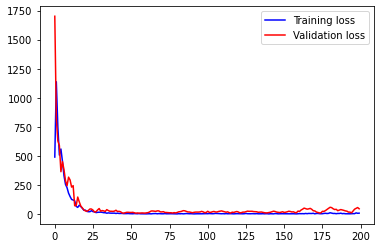

In [ ]:
learning_rate = [0.001,0.005,0.01,0.05,0.1,0.5,1]

for i in learning_rate:
  print('_______________________________________________________')
  print("LEARNING RATE:")
  print(i)
  model = Sequential()
  model.add(keras.layers.Flatten(input_shape=(1140,)))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='selu'))            #,kernel_regularizer=regularizers.L2(0.5)))
  model.add(Dropout(0.2))
  model.add(Dense(3, activation='softmax'))          #,kernel_regularizer=regularizers.L1(0.05)))

  # Optimizer
  opt = Adam(lr=i) # adam(0.1), SGD(lr=0.01)

  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  #tf.keras.losses.CategoricalCrossentropy/'sparse_categorical_crossentropy'

  history = model.fit(
      X_train, y_train,
      validation_split=0.2,
      epochs=200, batch_size=256)

  # Plot CURVE
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  import matplotlib.pyplot as plt
  epochs = range(len(acc))
  plt.plot(epochs,acc,'b',label='Training acc')
  plt.plot(epochs,val_acc,'r',label='Validation acc')
  plt.legend()
  plt.figure()
  plt.plot(epochs,loss,'b',label='Training loss')
  plt.plot(epochs,val_loss,'r',label='Validation loss')
  plt.legend()
  plt.show()

_______________________________________________________
LEARNING RATE:
0.001
Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 159ms/step - loss: 4.0286 - accuracy: 0.3150 - val_loss: 3.3168 - val_accuracy: 0.2812
Epoch 2/200
2/2 [==============================] - 0s 25ms/step - loss: 3.9622 - accuracy: 0.3150 - val_loss: 3.2351 - val_accuracy: 0.2812
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 3.8278 - accuracy: 0.3150 - val_loss: 3.1537 - val_accuracy: 0.3021
Epoch 4/200
2/2 [==============================] - 0s 25ms/step - loss: 3.4863 - accuracy: 0.3307 - val_loss: 3.0758 - val_accuracy: 0.3125
Epoch 5/200
2/2 [==============================] - 0s 21ms/step - loss: 3.5308 - accuracy: 0.3517 - val_loss: 3.0003 - val_accuracy: 0.3021
Epoch 6/200
2/2 [==============================] - 0s 20ms/step - loss: 3.5802 - accuracy: 0.3228 - val_loss: 2.9264 - val_accuracy: 0.3021
Epoch 7/200
2/2 [==============================] - 0s 20ms/step - loss: 3.5037 - accuracy: 0.3228 - val_loss: 2.8538 - val_accuracy: 0.3021
Epoch 8/200
2/2 [==============

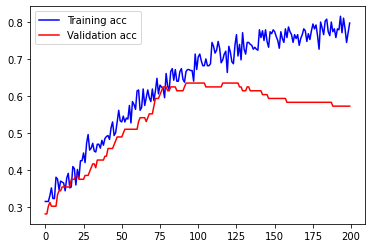

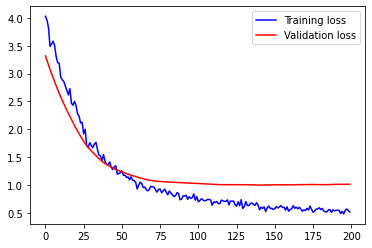

_______________________________________________________
LEARNING RATE:
0.005
Epoch 1/200
2/2 [==============================] - 0s 135ms/step - loss: 3.8254 - accuracy: 0.3202 - val_loss: 2.7184 - val_accuracy: 0.3542
Epoch 2/200
2/2 [==============================] - 0s 21ms/step - loss: 2.9262 - accuracy: 0.3596 - val_loss: 2.3472 - val_accuracy: 0.3854
Epoch 3/200
2/2 [==============================] - 0s 21ms/step - loss: 2.5726 - accuracy: 0.3780 - val_loss: 2.0796 - val_accuracy: 0.3646
Epoch 4/200
2/2 [==============================] - 0s 21ms/step - loss: 2.0917 - accuracy: 0.4619 - val_loss: 1.9061 - val_accuracy: 0.3438
Epoch 5/200
2/2 [==============================] - 0s 21ms/step - loss: 1.9401 - accuracy: 0.4226 - val_loss: 1.8008 - val_accuracy: 0.3229
Epoch 6/200
2/2 [==============================] - 0s 20ms/step - loss: 1.8262 - accuracy: 0.4304 - val_loss: 1.7352 - val_accuracy: 0.3438
Epoch 7/200
2/2 [==============================] - 0s 22ms/step - loss: 1.5308 - a

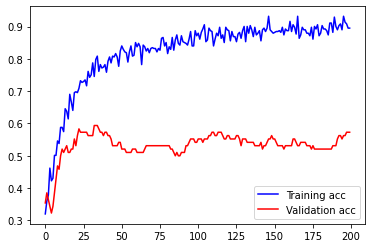

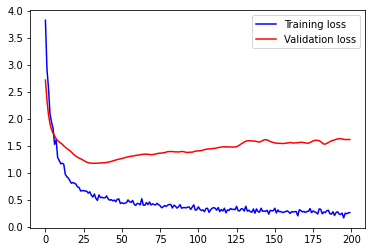

_______________________________________________________
LEARNING RATE:
0.01
Epoch 1/200
2/2 [==============================] - 1s 141ms/step - loss: 3.6319 - accuracy: 0.3438 - val_loss: 2.3833 - val_accuracy: 0.3438
Epoch 2/200
2/2 [==============================] - 0s 23ms/step - loss: 2.6506 - accuracy: 0.3675 - val_loss: 1.9063 - val_accuracy: 0.3958
Epoch 3/200
2/2 [==============================] - 0s 23ms/step - loss: 2.0032 - accuracy: 0.4724 - val_loss: 1.5887 - val_accuracy: 0.4167
Epoch 4/200
2/2 [==============================] - 0s 21ms/step - loss: 1.6403 - accuracy: 0.4698 - val_loss: 1.3981 - val_accuracy: 0.4271
Epoch 5/200
2/2 [==============================] - 0s 22ms/step - loss: 1.3701 - accuracy: 0.5171 - val_loss: 1.3024 - val_accuracy: 0.4479
Epoch 6/200
2/2 [==============================] - 0s 22ms/step - loss: 1.1533 - accuracy: 0.5801 - val_loss: 1.2553 - val_accuracy: 0.5208
Epoch 7/200
2/2 [==============================] - 0s 22ms/step - loss: 1.0069 - ac

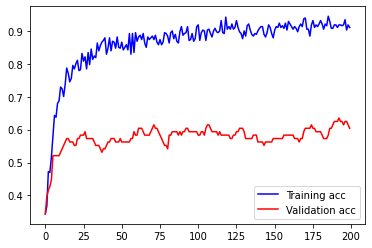

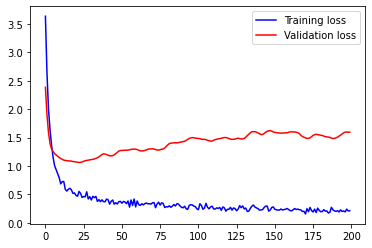

_______________________________________________________
LEARNING RATE:
0.05
Epoch 1/200
2/2 [==============================] - 0s 153ms/step - loss: 3.0631 - accuracy: 0.3465 - val_loss: 1.5302 - val_accuracy: 0.4583
Epoch 2/200
2/2 [==============================] - 0s 22ms/step - loss: 1.4899 - accuracy: 0.5013 - val_loss: 1.2972 - val_accuracy: 0.4688
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 1.1984 - accuracy: 0.5354 - val_loss: 1.0732 - val_accuracy: 0.4583
Epoch 4/200
2/2 [==============================] - 0s 27ms/step - loss: 0.9298 - accuracy: 0.5748 - val_loss: 1.0015 - val_accuracy: 0.4479
Epoch 5/200
2/2 [==============================] - 0s 23ms/step - loss: 0.8903 - accuracy: 0.6142 - val_loss: 1.0077 - val_accuracy: 0.5417
Epoch 6/200
2/2 [==============================] - 0s 22ms/step - loss: 0.9235 - accuracy: 0.5853 - val_loss: 0.9961 - val_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 22ms/step - loss: 0.8569 - ac

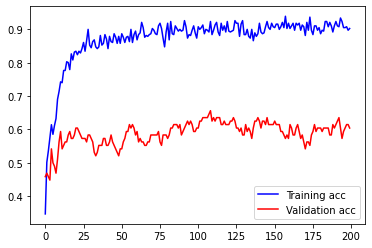

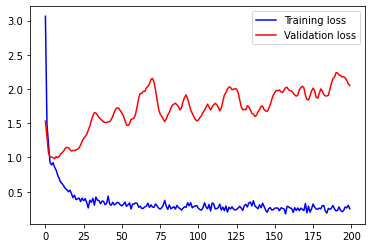

_______________________________________________________
LEARNING RATE:
0.1
Epoch 1/200
2/2 [==============================] - 1s 432ms/step - loss: 2.9180 - accuracy: 0.3701 - val_loss: 1.7257 - val_accuracy: 0.3750
Epoch 2/200
2/2 [==============================] - 0s 25ms/step - loss: 1.5207 - accuracy: 0.5039 - val_loss: 1.1974 - val_accuracy: 0.4688
Epoch 3/200
2/2 [==============================] - 0s 23ms/step - loss: 1.1952 - accuracy: 0.4567 - val_loss: 1.0960 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 23ms/step - loss: 1.2074 - accuracy: 0.4357 - val_loss: 1.2602 - val_accuracy: 0.4375
Epoch 5/200
2/2 [==============================] - 0s 26ms/step - loss: 1.0593 - accuracy: 0.5381 - val_loss: 1.3791 - val_accuracy: 0.4896
Epoch 6/200
2/2 [==============================] - 0s 22ms/step - loss: 1.0137 - accuracy: 0.6299 - val_loss: 1.2588 - val_accuracy: 0.5521
Epoch 7/200
2/2 [==============================] - 0s 23ms/step - loss: 0.9703 - acc

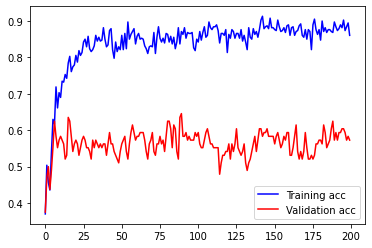

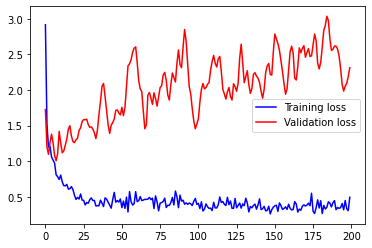

_______________________________________________________
LEARNING RATE:
0.5
Epoch 1/200
2/2 [==============================] - 0s 151ms/step - loss: 7.6471 - accuracy: 0.2966 - val_loss: 9.0120 - val_accuracy: 0.3021
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 13.7688 - accuracy: 0.3753 - val_loss: 16.7701 - val_accuracy: 0.4167
Epoch 3/200
2/2 [==============================] - 0s 24ms/step - loss: 15.6341 - accuracy: 0.4567 - val_loss: 7.0675 - val_accuracy: 0.3125
Epoch 4/200
2/2 [==============================] - 0s 23ms/step - loss: 9.3551 - accuracy: 0.4357 - val_loss: 9.2381 - val_accuracy: 0.3021
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 8.3530 - accuracy: 0.4173 - val_loss: 7.7512 - val_accuracy: 0.4479
Epoch 6/200
2/2 [==============================] - 0s 25ms/step - loss: 8.1539 - accuracy: 0.4488 - val_loss: 13.4527 - val_accuracy: 0.3125
Epoch 7/200
2/2 [==============================] - 0s 26ms/step - loss: 9.0119 -

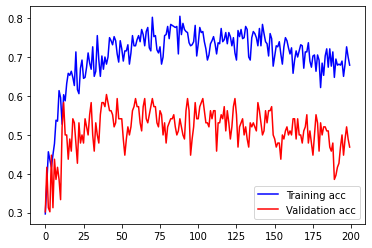

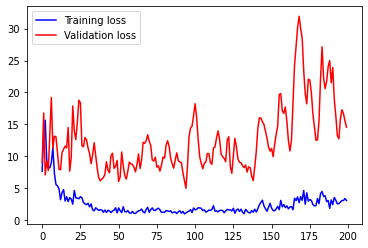

_______________________________________________________
LEARNING RATE:
1
Epoch 1/200
2/2 [==============================] - 0s 148ms/step - loss: 27.0283 - accuracy: 0.3281 - val_loss: 84.5954 - val_accuracy: 0.3229
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 108.8216 - accuracy: 0.3465 - val_loss: 30.3138 - val_accuracy: 0.4062
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 46.0550 - accuracy: 0.4514 - val_loss: 52.1027 - val_accuracy: 0.3438
Epoch 4/200
2/2 [==============================] - 0s 25ms/step - loss: 55.9043 - accuracy: 0.3675 - val_loss: 37.5414 - val_accuracy: 0.3542
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 38.0663 - accuracy: 0.3701 - val_loss: 23.1354 - val_accuracy: 0.4896
Epoch 6/200
2/2 [==============================] - 0s 24ms/step - loss: 34.0557 - accuracy: 0.4724 - val_loss: 34.7214 - val_accuracy: 0.4375
Epoch 7/200
2/2 [==============================] - 0s 42ms/step - loss: 3

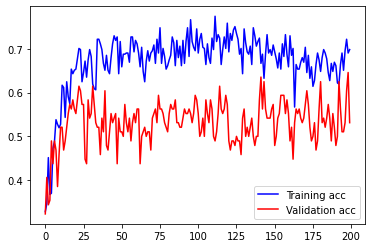

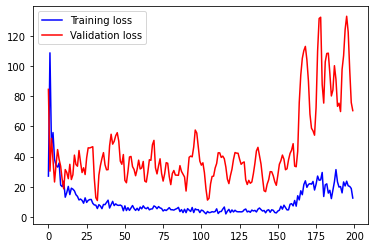

In [ ]:
# Train with X after PCA

learning_rate = [0.001,0.005,0.01,0.05,0.1,0.5,1]

for i in learning_rate:
  print('_______________________________________________________')
  print("LEARNING RATE:")
  print(i)
  model = Sequential()
  model.add(keras.layers.Flatten(input_shape=(X_train_pca99.shape[1],)))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='selu'))            #,kernel_regularizer=regularizers.L2(0.5)))
  model.add(Dropout(0.2))
  model.add(Dense(3, activation='softmax'))          #,kernel_regularizer=regularizers.L1(0.05)))

  # Optimizer
  opt = Adam(lr=i) # adam(0.1), SGD(lr=0.01)

  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  #tf.keras.losses.CategoricalCrossentropy/'sparse_categorical_crossentropy'

  history = model.fit(
      X_train_pca99, y_train,
      validation_split=0.2,
      epochs=200, batch_size=256)

  # Plot CURVE
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  import matplotlib.pyplot as plt
  epochs = range(len(acc))
  plt.plot(epochs,acc,'b',label='Training acc')
  plt.plot(epochs,val_acc,'r',label='Validation acc')
  plt.legend()
  plt.figure()
  plt.plot(epochs,loss,'b',label='Training loss')
  plt.plot(epochs,val_loss,'r',label='Validation loss')
  plt.legend()
  plt.show()

In [ ]:
# chosen PCA99 + lr=0.001
# Now train on all of data
# then Predict & print model performance

model = Sequential()
model.add(keras.layers.Flatten(input_shape=(X_train_pca99.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

# Optimizer
opt = Adam(lr=0.001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Now train on all of data
history = model.fit(
    X_train_pca99, y_train,
    epochs=100, batch_size=256)

# Predict
y_pred = model.predict(X_test_pca99)

print(np.sum(y_pred[0]))

print(y_pred.argmax(axis=1))

# print model performance

cf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(cf_matrix)

print(classification_report(y_test, y_pred.argmax(axis=1)))

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 8ms/step - loss: 2.7661 - accuracy: 0.3249
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 2.9843 - accuracy: 0.3166
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 2.7447 - accuracy: 0.3732
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 2.6644 - accuracy: 0.3459
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 2.6054 - accuracy: 0.3082
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 2.3668 - accuracy: 0.3375
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 2.4776 - accuracy: 0.3690
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 2.4148 - accuracy: 0.3648
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 2.2848 - accuracy: 0.3732
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 2.2729 - accuracy: 0.3312
Epoch 11/100
2/2 [====================

# {'var_optimizer': <class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'>, 'var_activation2': 'relu', 'var_activation1': 'relu', 'learnRate': 0.1, 'hiddenLayer2': 18, 'hiddenLayer1': 18, 'dropout3': 0.1, 'dropout2': 0.2, 'dropout1': 0.2}

Epoch 1/300
2/2 [==============================] - 0s 153ms/step - loss: 1.3852 - accuracy: 0.3937 - val_loss: 1.3963 - val_accuracy: 0.2292
Epoch 2/300
2/2 [==============================] - 0s 22ms/step - loss: 1.3472 - accuracy: 0.3937 - val_loss: 1.1419 - val_accuracy: 0.3333
Epoch 3/300
2/2 [==============================] - 0s 25ms/step - loss: 1.1126 - accuracy: 0.4278 - val_loss: 1.1140 - val_accuracy: 0.4167
Epoch 4/300
2/2 [==============================] - 0s 39ms/step - loss: 1.0703 - accuracy: 0.4698 - val_loss: 1.1057 - val_accuracy: 0.4167
Epoch 5/300
2/2 [==============================] - 0s 23ms/step - loss: 1.0328 - accuracy: 0.4173 - val_loss: 1.0501 - val_accuracy: 0.4688
Epoch 6/300
2/2 [==============================] - 0s 25ms/step - loss: 1.0103 - accuracy: 0.4882 - val_loss: 1.0472 - val_accuracy: 0.4375
Epoch 7/300
2/2 [==============================] - 0s 22ms/step - loss: 1.0146 - accuracy: 0.4829 - val_loss: 1.0344 - val_accuracy: 0.4479
Epoch 8/300
2/2 [==

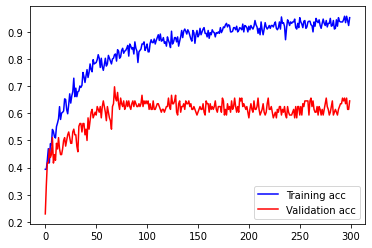

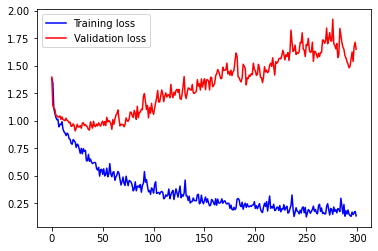

Epoch 1/300
2/2 [==============================] - 0s 8ms/step - loss: 0.4891 - accuracy: 0.8742
Epoch 2/300
2/2 [==============================] - 0s 6ms/step - loss: 0.4668 - accuracy: 0.8658
Epoch 3/300
2/2 [==============================] - 0s 11ms/step - loss: 0.3729 - accuracy: 0.8763
Epoch 4/300
2/2 [==============================] - 0s 7ms/step - loss: 0.3898 - accuracy: 0.8721
Epoch 5/300
2/2 [==============================] - 0s 8ms/step - loss: 0.3509 - accuracy: 0.8847
Epoch 6/300
2/2 [==============================] - 0s 7ms/step - loss: 0.3062 - accuracy: 0.8973
Epoch 7/300
2/2 [==============================] - 0s 6ms/step - loss: 0.3056 - accuracy: 0.8763
Epoch 8/300
2/2 [==============================] - 0s 7ms/step - loss: 0.3423 - accuracy: 0.8805
Epoch 9/300
2/2 [==============================] - 0s 10ms/step - loss: 0.3131 - accuracy: 0.8910
Epoch 10/300
2/2 [==============================] - 0s 7ms/step - loss: 0.3033 - accuracy: 0.8952
Epoch 11/300
2/2 [=========

In [ ]:
model2 = build_model(var_activation1='relu', hiddenLayer1=18,
                var_activation2='relu', hiddenLayer2=18,
                var_optimizer=SGD,  learnRate=0.1,
                dropout1=0.2,  dropout2=0.2, dropout3=0.1)

history = model2.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300, batch_size=256)

# Plot CURVE
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
epochs = range(len(acc))
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend()
plt.show()

model2.fit(
    X_train, y_train,
    epochs=300, batch_size=256)


# Predict
y_pred = model2.predict(X_test)

print(np.sum(y_pred[0]))

print(y_pred.argmax(axis=1))

# print model performance

cf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(cf_matrix)

print(classification_report(y_test, y_pred.argmax(axis=1)))

Epoch 1/400
2/2 [==============================] - 1s 254ms/step - loss: 2.6211 - accuracy: 0.3622 - val_loss: 1.5886 - val_accuracy: 0.2396
Epoch 2/400
2/2 [==============================] - 0s 31ms/step - loss: 1.5324 - accuracy: 0.3701 - val_loss: 1.3819 - val_accuracy: 0.2917
Epoch 3/400
2/2 [==============================] - 0s 33ms/step - loss: 1.3263 - accuracy: 0.4121 - val_loss: 1.2732 - val_accuracy: 0.4167
Epoch 4/400
2/2 [==============================] - 0s 32ms/step - loss: 1.3739 - accuracy: 0.3596 - val_loss: 1.1831 - val_accuracy: 0.4375
Epoch 5/400
2/2 [==============================] - 0s 37ms/step - loss: 1.2649 - accuracy: 0.4304 - val_loss: 1.1458 - val_accuracy: 0.4062
Epoch 6/400
2/2 [==============================] - 0s 36ms/step - loss: 1.2252 - accuracy: 0.4068 - val_loss: 1.1671 - val_accuracy: 0.3229
Epoch 7/400
2/2 [==============================] - 0s 33ms/step - loss: 1.1963 - accuracy: 0.3911 - val_loss: 1.1255 - val_accuracy: 0.3438
Epoch 8/400
2/2 [==

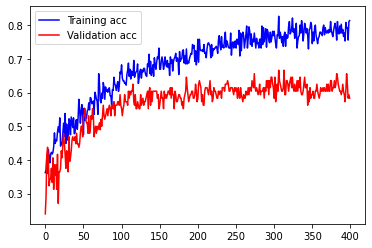

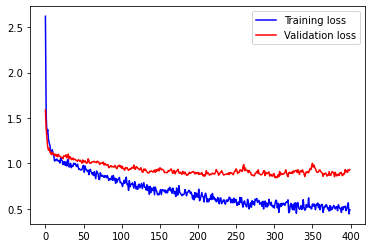

Epoch 1/300
2/2 [==============================] - 0s 12ms/step - loss: 0.6275 - accuracy: 0.7505
Epoch 2/300
2/2 [==============================] - 0s 7ms/step - loss: 0.6286 - accuracy: 0.7400
Epoch 3/300
2/2 [==============================] - 0s 7ms/step - loss: 0.5712 - accuracy: 0.7757
Epoch 4/300
2/2 [==============================] - 0s 6ms/step - loss: 0.6425 - accuracy: 0.7442
Epoch 5/300
2/2 [==============================] - 0s 7ms/step - loss: 0.6286 - accuracy: 0.7233
Epoch 6/300
2/2 [==============================] - 0s 6ms/step - loss: 0.6309 - accuracy: 0.7317
Epoch 7/300
2/2 [==============================] - 0s 7ms/step - loss: 0.5796 - accuracy: 0.7505
Epoch 8/300
2/2 [==============================] - 0s 6ms/step - loss: 0.5767 - accuracy: 0.7652
Epoch 9/300
2/2 [==============================] - 0s 7ms/step - loss: 0.5877 - accuracy: 0.7820
Epoch 10/300
2/2 [==============================] - 0s 7ms/step - loss: 0.5793 - accuracy: 0.7547
Epoch 11/300
2/2 [==========

In [ ]:
var_activation1='relu'; hiddenLayer1=18;
var_activation2='relu'; hiddenLayer2=18;
var_optimizer=SGD;  learnRate=0.1;
dropout1=0.2;  dropout2=0.2; dropout3=0.1

model = Sequential()
model.add(Flatten(input_shape=(X_train_pca99.shape[1],)))
model.add(Dropout(dropout1))
model.add(Dense(hiddenLayer1,activation=var_activation1))
model.add(Dropout(dropout2))
model.add(Dense(hiddenLayer2,activation=var_activation2))
model.add(Dropout(dropout3))
model.add(Dense(3,activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=var_optimizer(learning_rate=learnRate),
              metrics=["accuracy"])

history = model.fit(
    X_train_pca99, y_train,
    validation_split=0.2,
    epochs=400, batch_size=256)

# Plot CURVE
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
epochs = range(len(acc))
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend()
plt.show()

model.fit(
    X_train_pca99, y_train,
    epochs=300, batch_size=256)


# Predict
y_pred = model.predict(X_test_pca95)

print(np.sum(y_pred[0]))

print(y_pred.argmax(axis=1))

# print model performance

cf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(cf_matrix)

print(classification_report(y_test, y_pred.argmax(axis=1)))

# Tuning for PCA 99

In [ ]:
def build_model(var_activation1='relu', hiddenLayer1=10,
                var_activation2='relu', hiddenLayer2=10,
                var_optimizer=Adam,  learnRate=0.01,
                dropout1=0.2,  dropout2=0.2, dropout3=0.2,
                reg1=0.05,reg2=0.05):

  """ Uses arguments to build Keras model. """

  model = Sequential()
  model.add(Flatten(input_shape=(X_test_pca99.shape[1],)))
  model.add(Dropout(dropout1))
  model.add(Dense(hiddenLayer1,activation=var_activation1,kernel_regularizer=regularizers.L2(reg1) ))
  model.add(Dropout(dropout2))
  model.add(Dense(hiddenLayer2,activation=var_activation2,kernel_regularizer=regularizers.L2(reg2) ))
  model.add(Dropout(dropout3))
  model.add(Dense(3,activation='softmax'))

  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=var_optimizer(learning_rate=learnRate),
                metrics=["accuracy"])

  return model

In [ ]:
# Set variables
activations1 = ['relu'] # ['tanh','relu','selu','softmax','sigmoid']
hiddenLayer1 = [18]     # [2,4,6,8,10,12,14,16,18,20]

activations2 = ['tanh','relu','selu','softmax','sigmoid']
hiddenLayer2 = [18]     # [2,4,6,8,10,12,14,16,18,20]

optimizers   = [Adam]   # [Adam, SGD, RMSprop]
learnRate    = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 1]   # than 1.0 and greater than 10^-6.

dropout1     = [0.2] # [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
dropout2     = [0.2] # [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
dropout3     = [0.1] # [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

reg1         = [0.01] #,0.02,0.03,0.04,0.05]
reg2         = [0.01] #,0.02,0.03,0.04,0.05]

params=dict(var_activation1=activations1,  hiddenLayer1 = hiddenLayer1,
            var_activation2=activations2,  hiddenLayer2 = hiddenLayer2,
            var_optimizer=optimizers,      learnRate = learnRate,
            dropout1=dropout1,             dropout2=dropout2,        dropout3=dropout3,
            reg1=reg1,                     reg2=reg2,
            )

In [ ]:
model = KerasClassifier(build_fn=build_model,epochs=150,batch_size=256)
np.random.seed(42)

rscv = RandomizedSearchCV(model,  param_distributions=params, cv=3,     n_jobs=-1)
rscv_results = rscv.fit(X_train_pca99,y_train)

print('Best score is: {} using {}'.format(rscv_results.best_score_,rscv_results.best_params_))

print('Best Prediction:')
print(   classification_report(y_test,rscv_results.predict(X_test_pca99)) )

<ipython-input-49-56ad36e2248f>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model,epochs=150,batch_size=256)


Epoch 1/150
2/2 [==============================] - 1s 8ms/step - loss: 1.6106 - accuracy: 0.3585
Epoch 2/150
2/2 [==============================] - 0s 7ms/step - loss: 1.3604 - accuracy: 0.3878
Epoch 3/150
2/2 [==============================] - 0s 11ms/step - loss: 1.2311 - accuracy: 0.5052
Epoch 4/150
2/2 [==============================] - 0s 8ms/step - loss: 1.1897 - accuracy: 0.5178
Epoch 5/150
2/2 [==============================] - 0s 8ms/step - loss: 1.1495 - accuracy: 0.5556
Epoch 6/150
2/2 [==============================] - 0s 7ms/step - loss: 1.0630 - accuracy: 0.5996
Epoch 7/150
2/2 [==============================] - 0s 8ms/step - loss: 1.0451 - accuracy: 0.6143
Epoch 8/150
2/2 [==============================] - 0s 8ms/step - loss: 1.0288 - accuracy: 0.6310
Epoch 9/150
2/2 [==============================] - 0s 7ms/step - loss: 0.9725 - accuracy: 0.6813
Epoch 10/150
2/2 [==============================] - 0s 7ms/step - loss: 0.9693 - accuracy: 0.6981
Epoch 11/150
2/2 [==========

In [ ]:
model = build_model(var_activation1='relu', hiddenLayer1=18,
                var_activation2='relu', hiddenLayer2=18,
                var_optimizer=Adam,  learnRate=0.05,
                dropout1=0.2,  dropout2=0.2, dropout3=0.1,
                reg1=0.1, reg2=0.1)

history = model.fit(
    X_train_pca99, y_train,
    validation_split=0.2,
    epochs=300, batch_size=256)

# Plot CURVE
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
epochs = range(len(acc))
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend()
plt.show()

# Predict
y_pred = model.predict(X_test_pca99)

print(np.sum(y_pred[0]))

print(y_pred.argmax(axis=1))

# print model performance

cf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(cf_matrix)

print(classification_report(y_test, y_pred.argmax(axis=1)))

TypeError: ignored

# plot model

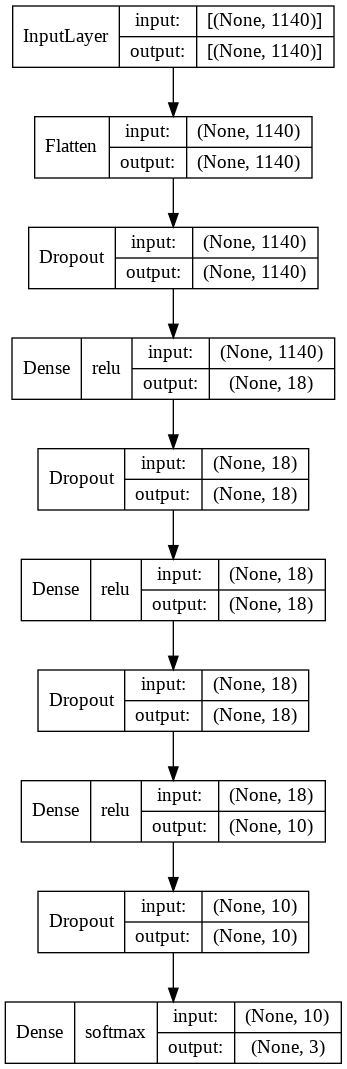

In [ ]:
model2 = build_model(var_optimizer = SGD, learnRate = 0.1,
                     var_activation2 = 'relu', var_activation1 = 'relu', hiddenLayer2 = 18, hiddenLayer1 = 18,
                     dropout3 = 0.1, dropout2 = 0.2, dropout1 = 0.2
)

from keras.utils.vis_utils import plot_model
plot_model(
    model2,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB', #TB: vertical plot, else LR
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

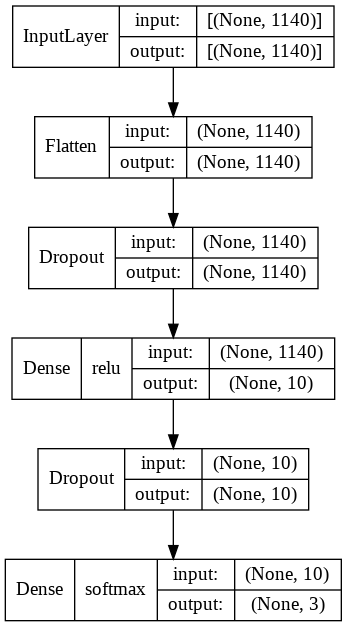

In [ ]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(1140,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))#,kernel_regularizer=regularizers.L2(0.5)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))#,kernel_regularizer=regularizers.L1(0.05)))

from tensorflow.keras.optimizers import Adam, SGD, RMSprop
opt = Adam(lr=0.1) # adam(0.1), SGD(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB', #TB: vertical plot, else LR
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

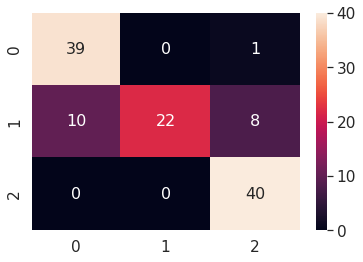

In [ ]:
cf_matrix = [[39,0,1],[10,22,8],[0,0,40]]
df_df = pd.DataFrame(cf_matrix, range(3), range(3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_df, annot=True, annot_kws={"size": 16}) # font size
plt.show()

Epoch 1/150
2/2 [==============================] - 1s 199ms/step - loss: 1.2111 - accuracy: 0.3281 - val_loss: 1.1702 - val_accuracy: 0.2917
Epoch 2/150
2/2 [==============================] - 0s 27ms/step - loss: 1.1633 - accuracy: 0.3150 - val_loss: 1.1456 - val_accuracy: 0.3125
Epoch 3/150
2/2 [==============================] - 0s 34ms/step - loss: 1.1718 - accuracy: 0.2940 - val_loss: 1.1219 - val_accuracy: 0.3542
Epoch 4/150
2/2 [==============================] - 0s 27ms/step - loss: 1.0826 - accuracy: 0.3832 - val_loss: 1.1040 - val_accuracy: 0.3750
Epoch 5/150
2/2 [==============================] - 0s 31ms/step - loss: 1.0984 - accuracy: 0.3622 - val_loss: 1.0902 - val_accuracy: 0.3646
Epoch 6/150
2/2 [==============================] - 0s 46ms/step - loss: 1.0763 - accuracy: 0.3990 - val_loss: 1.0931 - val_accuracy: 0.3750
Epoch 7/150
2/2 [==============================] - 0s 32ms/step - loss: 1.0618 - accuracy: 0.4016 - val_loss: 1.0757 - val_accuracy: 0.4583
Epoch 8/150
2/2 [==

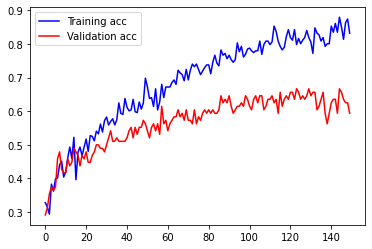

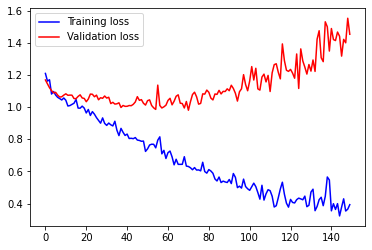

4/4 [==============================] - 0s 4ms/step
1.0
[0 0 0 2 0 2 0 0 0 2 2 2 1 2 1 2 0 0 0 2 2 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 0
 2 0 0 0 0 0 1 1 0 2 0 0 0 0 2 2 2 2 0 0 2 0 0 0 0 0 1 0 2 1 1 2 2 0 0 1 1
 2 2 2 2 1 2 2 2 0 1 0 2 0 0 2 0 0 0 2 0 0 1 0 0 2 1 2 0 0 2 2 2 1 2 0 0 2
 2 0 1 1 0 2 2 2 2]
[[36  4  0]
 [15 12 13]
 [ 1  0 39]]
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        40
           1       0.75      0.30      0.43        40
           2       0.75      0.97      0.85        40

    accuracy                           0.73       120
   macro avg       0.73      0.72      0.69       120
weighted avg       0.73      0.72      0.69       120



In [ ]:
np.random.seed(42)

history = model2.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150, batch_size=256)

# Plot CURVE
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
epochs = range(len(acc))
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend()
plt.show()

# Predict
y_pred = model2.predict(X_test)

print(np.sum(y_pred[0]))

print(y_pred.argmax(axis=1))

# print model performance

cf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(cf_matrix)

print(classification_report(y_test, y_pred.argmax(axis=1)))

# GB

In [ ]:
class RandomSearch(object):

    def __init__(self,X_train,y_train,model,hyperparameters):

        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters

    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 5
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 error_score='raise'
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_

    def BestModelPridict(self,X_test):

        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [ ]:
from scipy.stats import uniform

def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [ ]:
df_smote_train = pd.read_csv('/content/drive/MyDrive/Data/Major Psychiatric Disorders/SZ_BD_D_smote_train.csv')
df_smote_test = pd.read_csv('/content/drive/MyDrive/Data/Major Psychiatric Disorders/SZ_BD_D_smote_test.csv')

X_train = df_smote_train.drop(['specific.disorder','Unnamed: 0'],axis=1);y_train = df_smote_train['specific.disorder']

X_test  = df_smote_test.drop(['specific.disorder','Unnamed: 0'],axis=1);y_test  = df_smote_test['specific.disorder']

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test]); y = pd.Series.to_numpy(y)

In [ ]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

class Validation(object):
    def __init__(self,pipeline):
        self.pipeline = pipeline

    def FitAndPrediction(self,pipeline):
        mae_train,mae_test = [], []
        acc_train,acc_test = [],[]

        # Store y_test and y_pred of all k fold into list
        y_test_kfold = []
        y_test_pred_kfold,y_test_proba_kfold = [],[]

        kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=SEED) # split into k Folds

        for train_index, test_index in kf.split(X,y):

                X_train, X_test = X.iloc[train_index], X.iloc[test_index]     # acess X, y
                y_train, y_test = y[train_index], y[test_index]

                #print(X_train.shape[0],X_test.shape[0])
                #unique, counts = np.unique(y_train, return_counts=True)
                #print("DISTRIBUTION CHECKING:",dict(zip(unique, counts)))

                pipeline.fit(X_train, y_train)                       # fit

                y_train_pred = pipeline.predict(X_train)             # predict for Train set
                y_test_pred =  pipeline.predict(X_test)               # predict for Test set
                y_test_proba = pipeline.predict_proba(X_test)

                y_test_kfold.append(y_test)
                y_test_pred_kfold.append(y_test_pred);  y_test_proba_kfold.append(y_test_proba)

                mae_train.append(metrics.mean_absolute_error(y_train, y_train_pred))  # Error
                mae_test.append(metrics.mean_absolute_error(y_test, y_test_pred))

                acc_train.append(accuracy_score(y_train, y_train_pred))       # Accuracy
                acc_test.append(accuracy_score(y_test, y_test_pred))

        return y_test_kfold, y_test_pred_kfold,y_test_proba_kfold,acc_train,acc_test, mae_train, mae_test

    def PlotLearningAndErrorCurve(self,pipeline):
        _, _,_,acc_train,acc_test, mae_train, mae_test =self.FitAndPrediction(pipeline)
        fig, axs = plt.subplots(2)
        folds = np.arange(1, 5 + 1,1)

        axs[1].plot(mae_train, 'o-', color='green', label='train')         # Error curve
        axs[1].plot(mae_test, 'o-', color='red', label='test')
        axs[1].legend()
        axs[1].set_xlabel('Fold')
        axs[1].set_ylabel('Mean Absolute Error')
        axs[1].grid()


        axs[0].plot(acc_train, 'o-', color='green', label='train')        # Accuracy Curve
        axs[0].plot(acc_test, 'o-', color='red', label='test')
        axs[0].legend()
        axs[0].set_xlabel('Fold')
        axs[0].set_ylabel('Accuracy')
        axs[0].grid()

        plt.show()

    def PredictionPerformance(self,pipeline):
      y_test_kfold, y_test_pred_kfold,y_test_proba_kfold,_, _,_,_ =self.FitAndPrediction(pipeline)

      scores ={'precision':metrics.precision_score,
              'recall':metrics.recall_score,
              'f1':metrics.f1_score,}

      scores2 ={ 'accuracy':metrics.accuracy_score,
                'cf':metrics.multilabel_confusion_matrix,
                'MAE':metrics.mean_absolute_error}

      results_kfold = {}
      results = {}
      for i in np.arange(5):

        for score_name,score in scores.items():
          results_of_1metric = []
          result = score(y_test_pred_kfold[i],y_test_kfold[i],average=None)
          results_of_1metric.append(result)
          results[score_name]=results_of_1metric

        for score_name,score in scores2.items():
          results_of_1metric = []
          result = score(y_test_pred_kfold[i],y_test_kfold[i])
          results_of_1metric.append(result)
          results[score_name]=results_of_1metric

        results_kfold[i] = results

      results_kfold_df = pd.DataFrame(results_kfold).T
      return results_kfold_df

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param_grid = {#'learning_rate'   :  np.arange(0.5, 4,0.5),
              #'n_estimators'    : [10,20,30,50,100,150,200],
              'subsample'       : np.arange(0.1, 1.1,0.1),
              'max_depth'       : np.arange(10, 60,10),
              'min_samples_split' : np.arange(0.1, 1.1,0.1),
              'min_samples_leaf': np.arange(0.1, 0.6,0.1),
}

model_GB = GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 150)
GB_GridSearch = RandomSearch(X_train,y_train,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_GB).mean(),7))

Best: 0.683575 using {'subsample': 0.8, 'min_samples_split': 0.4, 'min_samples_leaf': 0.1, 'max_depth': 30}
prediction on test set is: 0.7833333


In [ ]:
param_grid = {'learning_rate'   :  np.arange(0.5, 4,0.5),
              'n_estimators'    : [5,10,20,30,50,100,150,200],
              'subsample'       : np.arange(0.1, 1.1,0.1),
              'max_depth'       : np.arange(10, 60,10),
              'min_samples_split' : np.arange(0.1, 1.1,0.1),
              'min_samples_leaf': np.arange(0.1, 0.6,0.1),
}

model_GB = GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 150)
GB_GridSearch = RandomSearch(X_train,y_train,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_GB).mean(),7))

Best: 0.623070 using {'subsample': 0.8, 'n_estimators': 30, 'min_samples_split': 0.4, 'min_samples_leaf': 0.1, 'max_depth': 50, 'learning_rate': 0.5}
prediction on test set is: 0.7333333


477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


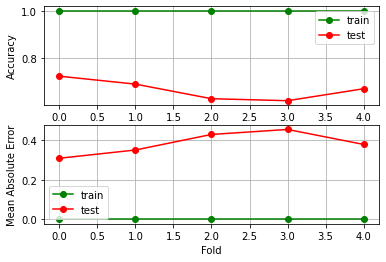

477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
477 120
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 159, 3: 160}
478 119
DISTRIBUTION CHECKING: {1: 159, 2: 160, 3: 159}
478 119
DISTRIBUTION CHECKING: {1: 160, 2: 159, 3: 159}


precision  ...                    MAE
0  [[0.5897435897435898, 0.65, 0.775]]  ...  [0.37815126050420167]
1  [[0.5897435897435898, 0.65, 0.775]]  ...  [0.37815126050420167]
2  [[0.5897435897435898, 0.65, 0.775]]  ...  [0.37815126050420167]
3  [[0.5897435897435898, 0.65, 0.775]]  ...  [0.37815126050420167]
4  [[0.5897435897435898, 0.65, 0.775]]  ...  [0.37815126050420167]

[5 rows x 6 columns]

In [ ]:
gb = GradientBoostingClassifier(subsample= 1.0, n_estimators=150, min_samples_split= 0.6,
                                min_samples_leaf=0.4, max_depth=30, learning_rate=1.0)
gb_validation = Validation(gb)
gb_validation.PlotLearningAndErrorCurve(gb)
gb_validation.PredictionPerformance(gb)

## n_estimators

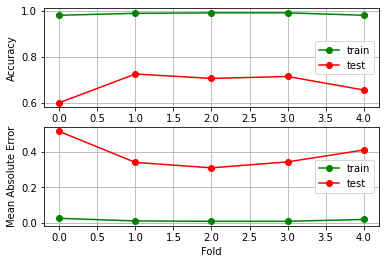

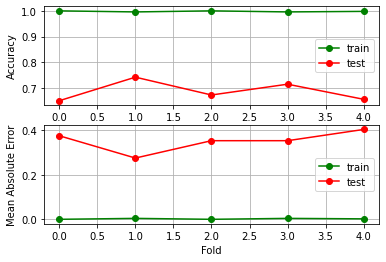

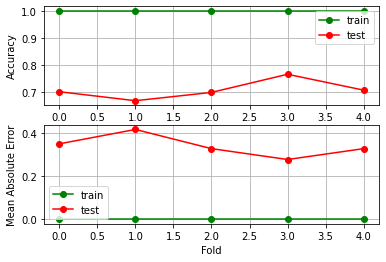

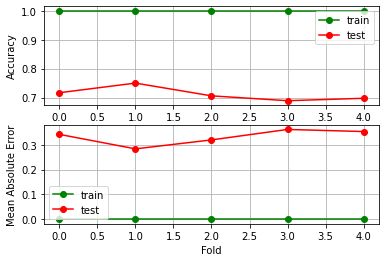

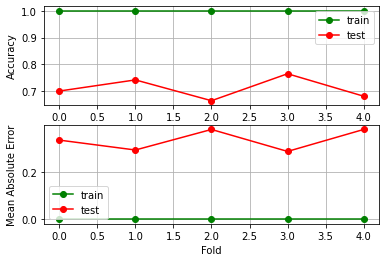

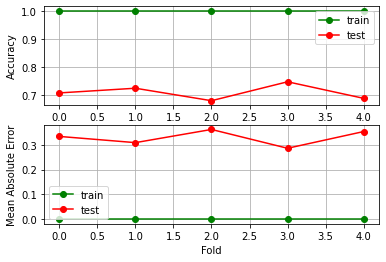

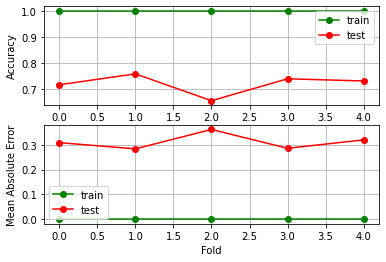

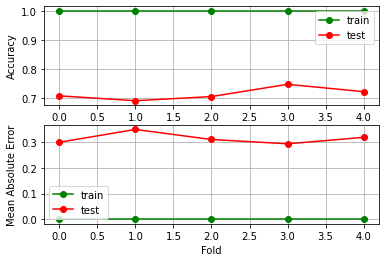

In [ ]:
n_estimators = [20,30,40,50,60,70,80,90]
for i in [20,30,40,50,60,70,80,90]:
    gb = GradientBoostingClassifier(subsample= 0.8, n_estimators=i, min_samples_split= 0.4,
                                    min_samples_leaf=0.1, max_depth=30, learning_rate=0.4)
    gb_validation = Validation(gb)
    gb_validation.PlotLearningAndErrorCurve(gb)
    #gb_validation.PredictionPerformance(gb)

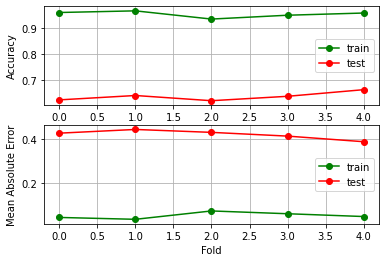

In [ ]:

gb = GradientBoostingClassifier(subsample= 0.8, n_estimators=15, min_samples_split= 0.4,
                                min_samples_leaf=0.1, max_depth=30, learning_rate=0.4)
gb_validation = Validation(gb)
gb_validation.PlotLearningAndErrorCurve(gb)
#gb_validation.PredictionPerformance(gb)

### n_estimtors + PCA

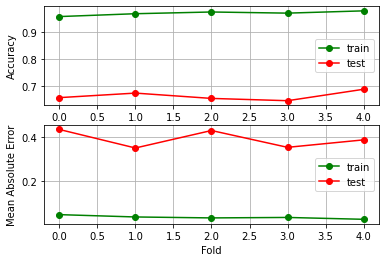

precision  ...                   MAE
0  [[0.717948717948718, 0.625, 0.8]]  ...  [0.3697478991596639]
1  [[0.717948717948718, 0.625, 0.8]]  ...  [0.3697478991596639]
2  [[0.717948717948718, 0.625, 0.8]]  ...  [0.3697478991596639]
3  [[0.717948717948718, 0.625, 0.8]]  ...  [0.3697478991596639]
4  [[0.717948717948718, 0.625, 0.8]]  ...  [0.3697478991596639]

[5 rows x 6 columns]

In [ ]:
gb = GradientBoostingClassifier(subsample= 0.8, n_estimators=20, min_samples_split= 0.4,
                                min_samples_leaf=0.1, max_depth=30, learning_rate=0.4)
pca_gb = Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[#('vt', VarianceThreshold()),
                                                #('sdt', StandardScaler()),
                                                ('pca', PCA(n_components=0.99))])),
                ('classifier', gb)])

pca_gb_validation = Validation(pca_gb)
pca_gb_validation.PlotLearningAndErrorCurve(pca_gb)
gb_validation.PredictionPerformance(gb)

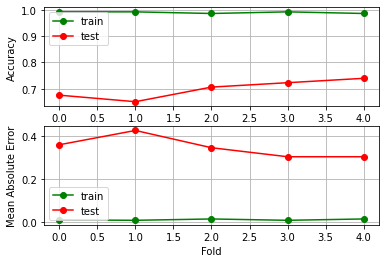

precision  ...                   MAE
0  [[0.48717948717948717, 0.7, 0.875]]  ...  [0.3865546218487395]
1  [[0.48717948717948717, 0.7, 0.875]]  ...  [0.3865546218487395]
2  [[0.48717948717948717, 0.7, 0.875]]  ...  [0.3865546218487395]
3  [[0.48717948717948717, 0.7, 0.875]]  ...  [0.3865546218487395]
4  [[0.48717948717948717, 0.7, 0.875]]  ...  [0.3865546218487395]

[5 rows x 6 columns]

In [ ]:
gb = GradientBoostingClassifier(subsample= 0.8, n_estimators=20, min_samples_split= 0.4,
                                min_samples_leaf=0.1, max_depth=30, learning_rate=0.4)
pca_vt_gb = Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=0.99)),
                                                ('vt', VarianceThreshold(threshold=0.9)),
                                                ])),
                ('classifier', gb)])

pca_vt_gb_validation = Validation(pca_vt_gb)
pca_vt_gb_validation.PlotLearningAndErrorCurve(pca_vt_gb)
pca_vt_gb_validation.PredictionPerformance(pca_vt_gb)

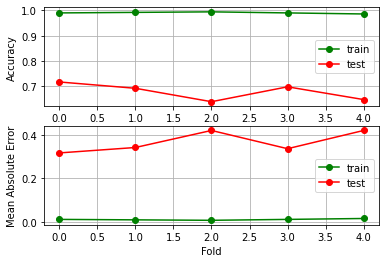

precision  ...                   MAE
0  [[0.717948717948718, 0.675, 0.875]]  ...  [0.3025210084033613]
1  [[0.717948717948718, 0.675, 0.875]]  ...  [0.3025210084033613]
2  [[0.717948717948718, 0.675, 0.875]]  ...  [0.3025210084033613]
3  [[0.717948717948718, 0.675, 0.875]]  ...  [0.3025210084033613]
4  [[0.717948717948718, 0.675, 0.875]]  ...  [0.3025210084033613]

[5 rows x 6 columns]

In [ ]:
gb = GradientBoostingClassifier(subsample= 0.8, n_estimators=20, min_samples_split= 0.4,
                                min_samples_leaf=0.1, max_depth=30, learning_rate=0.4)
pca_vt_gb = Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=0.99)),
                                                ('vt', VarianceThreshold(threshold=0.95)),
                                                ])),
                ('classifier', gb)])

pca_vt_gb_validation = Validation(pca_vt_gb)
pca_vt_gb_validation.PlotLearningAndErrorCurve(pca_vt_gb)
pca_vt_gb_validation.PredictionPerformance(pca_vt_gb)

## max_depth

_______________________________________________________
5


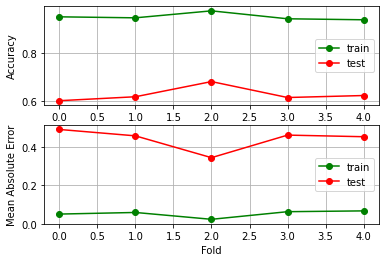

_______________________________________________________
8


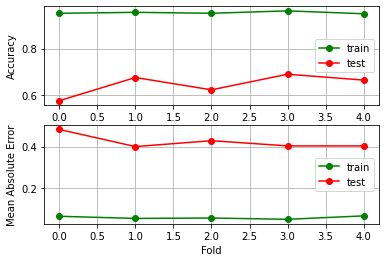

_______________________________________________________
10


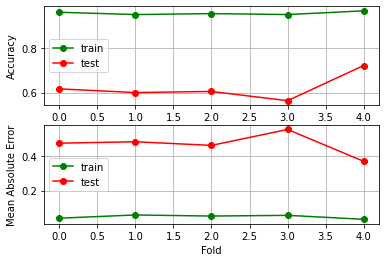

_______________________________________________________
12


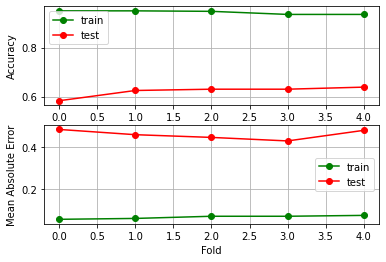

_______________________________________________________
15


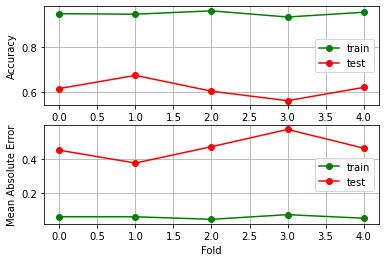

_______________________________________________________
20


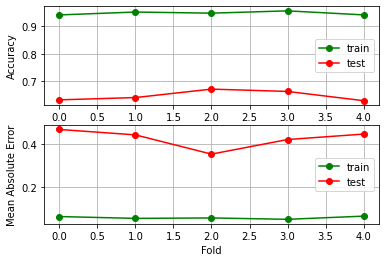

_______________________________________________________
22


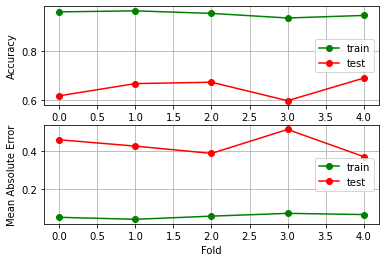

_______________________________________________________
25


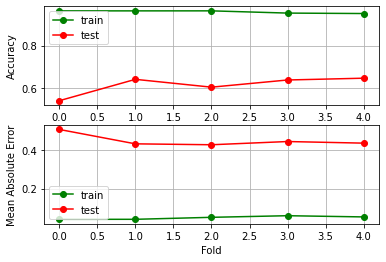

_______________________________________________________
28


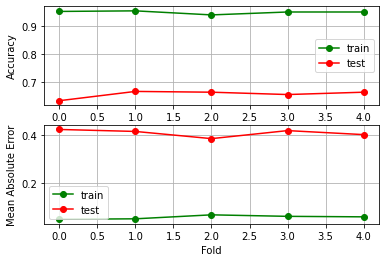

_______________________________________________________
30


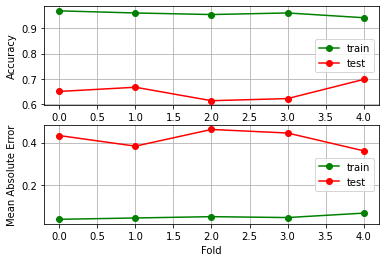

In [ ]:
max_depth = [5,8,10,12,15,20,22,25,28,30]
for i in max_depth:
  print('_______________________________________________________')
  print(i)
  gb = GradientBoostingClassifier(subsample= 0.8, n_estimators=15, min_samples_split= 0.4,
                                  min_samples_leaf=0.1, max_depth=i, learning_rate=0.4)
  gb_validation = Validation(gb)
  gb_validation.PlotLearningAndErrorCurve(gb)
  #gb_validation.PredictionPerformance(gb)

_______________________________________________________
5


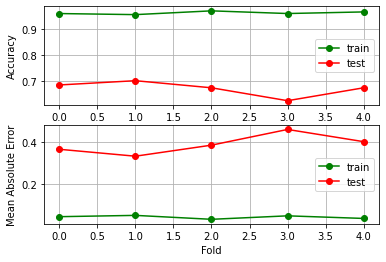

_______________________________________________________
8


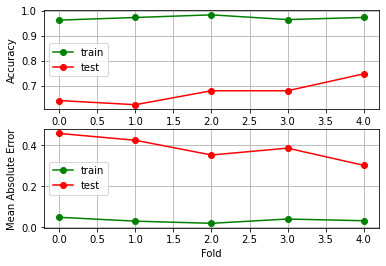

_______________________________________________________
10


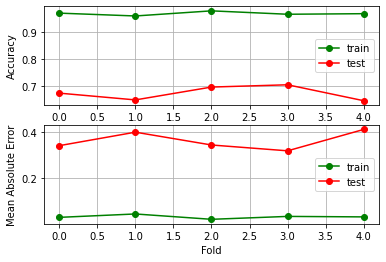

_______________________________________________________
12


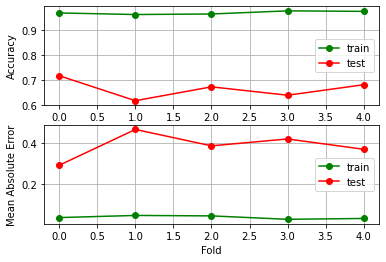

_______________________________________________________
15


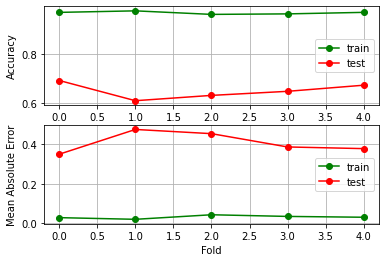

_______________________________________________________
20


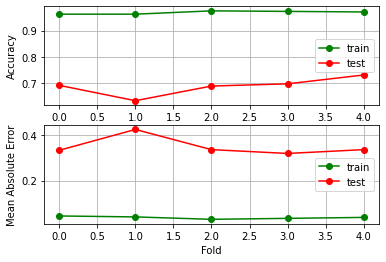

_______________________________________________________
22


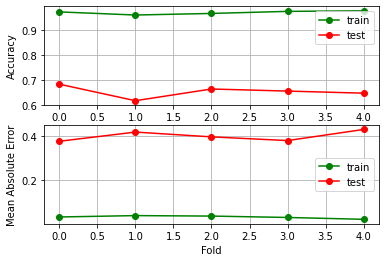

_______________________________________________________
25


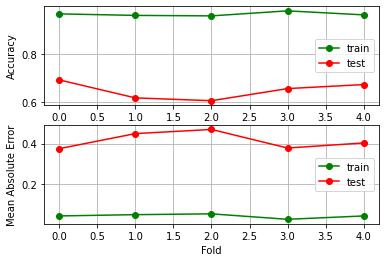

_______________________________________________________
28


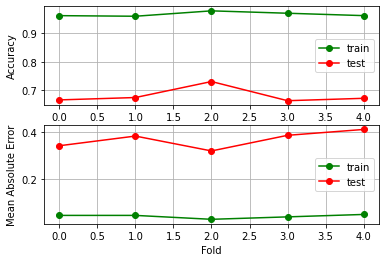

_______________________________________________________
30


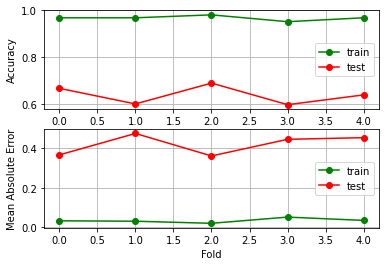

In [ ]:
max_depth = [5,8,10,12,15,20,22,25,28,30]
for i in max_depth:
  print('_______________________________________________________')
  print(i)
  gb = GradientBoostingClassifier(subsample= 0.8, n_estimators=15, min_samples_split= 0.4,
                                  min_samples_leaf=0.1, max_depth=i, learning_rate=0.4)
  pca_vt_gb = Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=0.99)),
                                                ('vt', VarianceThreshold(threshold=0.9)),
                                                ])),
                ('classifier', gb)])
  pca_vt_gb_validation = Validation(pca_vt_gb)
  pca_vt_gb_validation.PlotLearningAndErrorCurve(pca_vt_gb)
  #gb_validation.PredictionPerformance(gb)